In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12,8]


[yfinance documentation](https://pypi.org/project/yfinance/)

[Geeks for Geeks Tutorial](https://www.geeksforgeeks.org/get-financial-data-from-yahoo-finance-with-python/)

### Canada Oil and Gas

In [3]:
suncor_t = yf.Ticker('SU')
enbridge_t = yf.Ticker('ENB')
cenovus_t = yf.Ticker('CVE')


### Canada Tech


In [4]:
shopify_t = yf.Ticker('SHOP')
constsoft_t = yf.Ticker('CSU')
nuvei_t = yf.Ticker('NVEI')


In [5]:
### Get the ticker stock history in a dataframe ###
### Input the start and end dates and stock symbol ###
def get_tick_hist_df(start, end, symbol):
    
    ticker = yf.Ticker(symbol)
    df = ticker.history(start=start, end=end)
    df.title = symbol
    return df

In [6]:
# Create Stock DFs
suncor_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'SU')
enbridge_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'ENB')
cenovus_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'CVE')
shopify_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'SHOP')
nvidia_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'NVDA')
ethereum_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'ETH-USD')
globalx_df = get_tick_hist_df("2018-06-01", "2022-07-20", 'BKCH')


In [7]:
def plot_col(df,column):
    df[column].to_frame().plot()


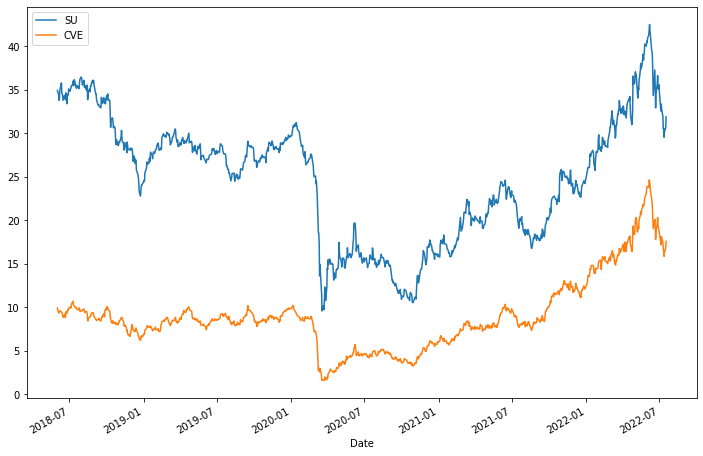

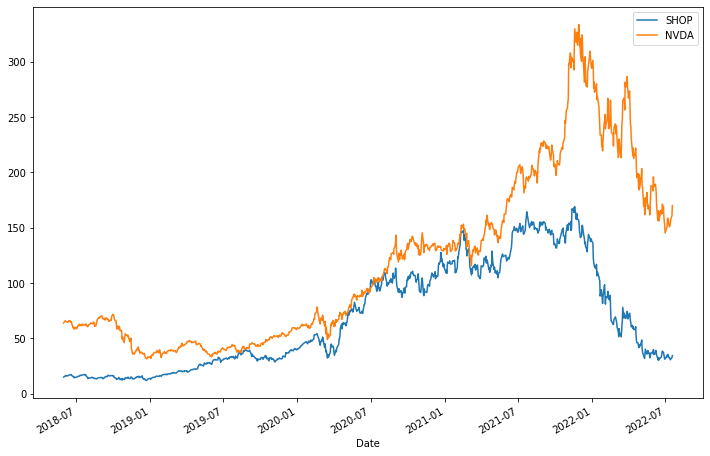

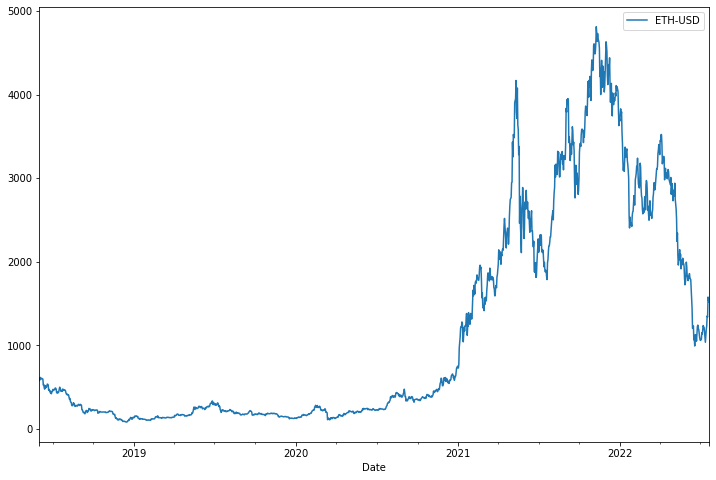

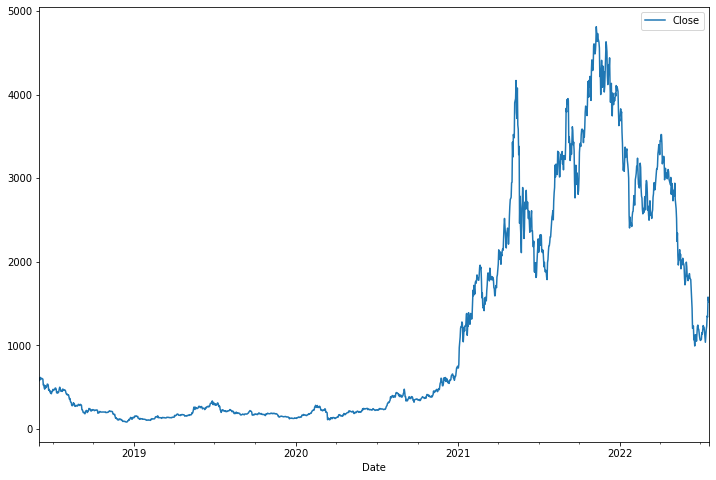

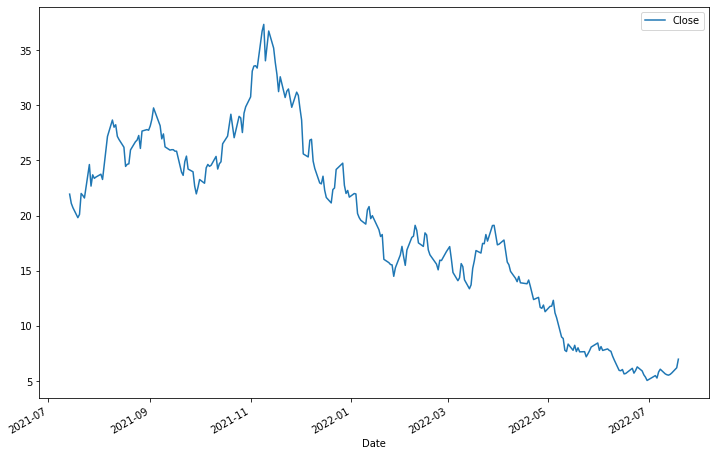

In [8]:
# Plot multiple stocks together in same plot
# Inputs are a list of stock history dataframes and the column to plot #

def plot_mult_dfs(dfs, column):
    data = {}
    for df in dfs:
        data[df.title] = df[column].values
    while True:
        try: 
            index = dfs[0].index
            new_df = pd.DataFrame(data, index=index)
            return new_df.plot()
        except ValueError:
            print("Length of data doesn't match")
            return

energy_stocks = [suncor_df, cenovus_df]
tech_stocks = [shopify_df, nvidia_df]

plot_mult_dfs(energy_stocks, 'Close')
plot_mult_dfs(tech_stocks, 'Close')
plot_mult_dfs([ethereum_df], 'Close')
plot_col(ethereum_df, 'Close')
plot_col(globalx_df, 'Close')

### Eco Station Monthly Users



observed
DateTime            
2011-01-31      8048
2011-02-28      8928
2011-03-31     11674
2011-04-30     19147
2011-05-31     24174

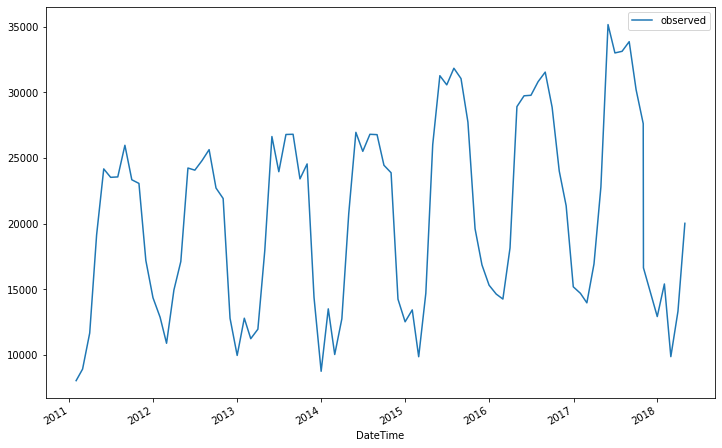

In [9]:
eco_df = pd.read_csv('./data/Eco_Station_Users_Monthly.csv').sort_values(by=['ID #'])
eco_df = eco_df.drop(columns=['Year','Month','ID #'])

eco_df['DateTime'] = pd.to_datetime(eco_df['DateTime'])
eco_df = eco_df.set_index('DateTime')

eco_df = eco_df.rename(columns={'# of Users': 'observed'})

eco_df.plot()
eco_df.head()


### Edmonton Water Height Levels

In [10]:
# water_ht_df = pd.read_csv('./data/EdmontonWaterHeight.csv')
# water_ht_df = water_ht_df.drop(['Station Number', 'Station Description', 'Latitude', 'Longitude', 'Station Location', 'Water Flow (cu meter per sec)'], axis=1)
# water_ht_df['Date'] = pd.to_datetime(water_ht_df['Date'])
# water_ht_df = water_ht_df.sort_values(by='Date')
# water_ht_df = water_ht_df.set_index('Date').drop(['Row ID'], axis=1)
# water_ht_df.head()

In [11]:
# import os

# water_ht_df.to_csv('data/water_levels.csv')

In [12]:
water_ht_df_min = pd.read_csv('data/water_levels.csv')

# SET DATE TO A DATETIME COLUMN
water_ht_df_min['Date'] = pd.to_datetime(water_ht_df_min['Date'])
# SET INDEX TO DATETIME
water_ht_df_min = water_ht_df_min.set_index('Date')

# drop rows where -1.000 is used for water level
water_ht_df_min = water_ht_df_min[water_ht_df_min['water_level'] > 0]

# use daily hours, data in approximately intervals of 5 minutes so 288 gets to about 24 hours
water_ht_df_min = water_ht_df_min.iloc[::288, :]

# rename 'water_level' to 'observed'"1-2 dataframes.ipynb"
water_ht_df_min = water_ht_df_min.rename(columns={"water_level":'observed'})


water_ht_df_min.head()


observed
Date                         
2016-10-15 08:00:00     3.401
2016-10-16 08:00:00     3.526
2016-10-17 08:00:00     3.818
2016-10-18 08:00:00     3.780
2016-10-19 08:00:00     3.833

<AxesSubplot:xlabel='Date'>

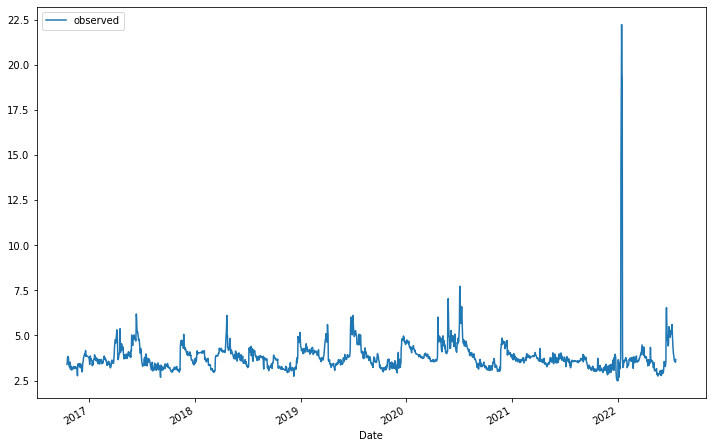

In [13]:
water_ht_df_min.plot()

Looks seasonal, not trending.

### Traffic Injury Information

In [14]:
traf_inj_df = pd.read_csv('./data/traffic_inj_info.csv')
# DROP UNUSED COLUMNS
traf_inj_df = traf_inj_df.drop(['ID', 'MONTH', 'YEAR', 'REPORT_PERIOD', 'POPULATION',
       'NUMBER_INJURIES', 'TARGET_INJURY_RATE'], axis=1)
# CONVERT DATETIME TO A DATETIME FORMAT
traf_inj_df['Date'] = pd.to_datetime(traf_inj_df['Date'])
traf_inj_df = traf_inj_df.sort_values(by='Date')
# SET INDEX
traf_inj_df = traf_inj_df.rename(columns={"INJURIES_PER_1000":'observed'})
traf_inj_df = traf_inj_df.set_index('Date')
# CHECK RESULTS

traf_inj_df

observed
Date                
2010-01-01       5.6
2010-02-01       5.4
2010-03-01       5.6
2010-04-01       5.6
2010-05-01       5.8
...              ...
2017-10-31       3.4
2017-11-30       3.5
2017-12-31       3.6
2017-12-31       4.0
2018-02-28       3.3

[98 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

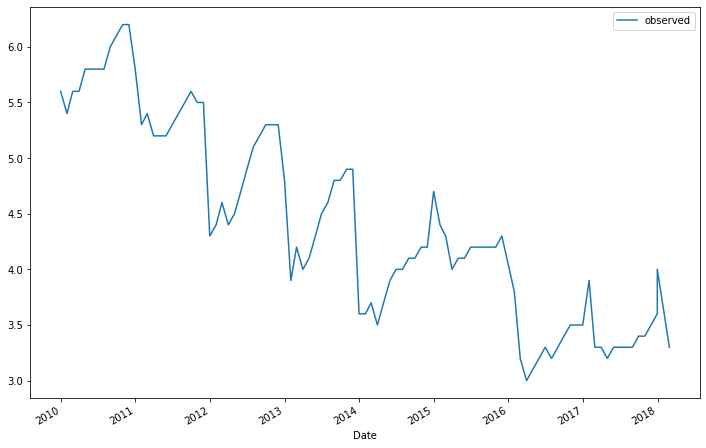

In [15]:
traf_inj_df.plot()

Looks seasonal and trending downwards.

### Global Average Temp


In [16]:
ave_temp_df = pd.read_csv('./data/monthly_global_temp.csv')

# Filter to one type of measurement
ave_temp_df = ave_temp_df[ave_temp_df['Source'] == 'GISTEMP']

ave_temp_df = ave_temp_df.drop(['Source'], axis=1)

# CONVERT DATETIME TO A DATETIME FORMAT
ave_temp_df['Date'] = pd.to_datetime(ave_temp_df['Date'])
ave_temp_df = ave_temp_df.sort_values(by='Date')
# SET INDEX
ave_temp_df = ave_temp_df.set_index('Date')

ave_temp_df = ave_temp_df.rename(columns={"Mean":'observed'})


ave_temp_df.head()


observed
Date                
1880-01-06     -0.30
1880-02-06     -0.21
1880-03-06     -0.18
1880-04-06     -0.27
1880-05-06     -0.14

<AxesSubplot:xlabel='Date'>

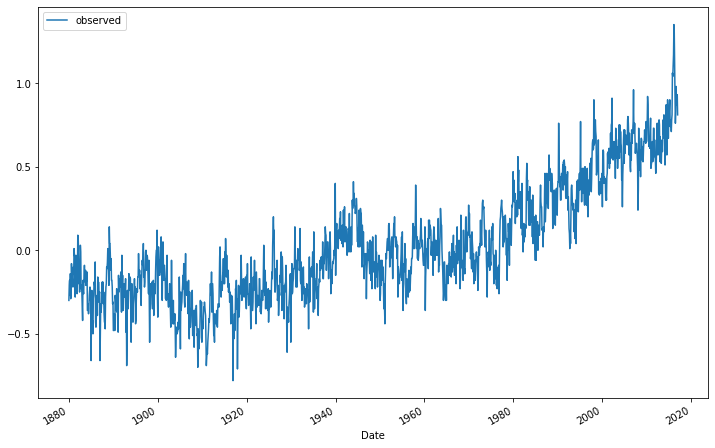

In [17]:
ave_temp_df.plot()

Looks to be trending up.

### Calgary Monthly Temp

observed
count  829.000000
mean     3.887817
std      9.498620
min    -25.300000
25%     -4.200000
50%      4.900000
75%     12.500000
max     19.600000

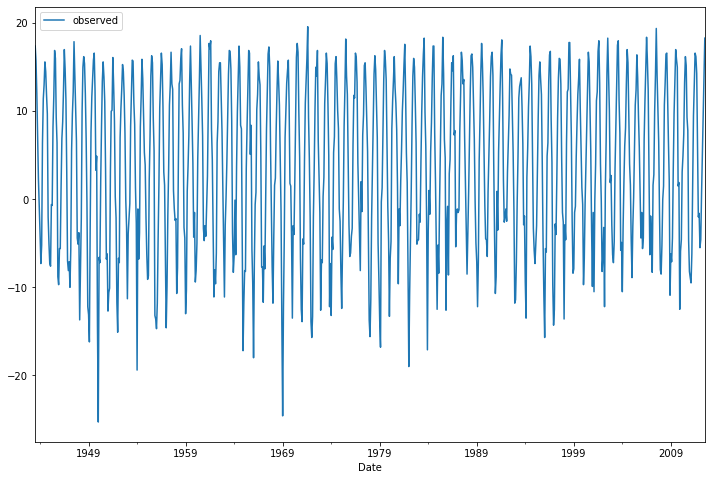

In [18]:
cgy_temp_df = pd.read_csv('./data/calgary_monthly_temps.csv')

# Filter to one type of measurement
cgy_temp_df = cgy_temp_df.drop(columns=['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Mean Max Temp (°C)',
       'Year', 'Month', 'Mean Max Temp Flag', 'Mean Min Temp (°C)', 'Mean Min Temp Flag', 'Mean Temp Flag', 'Extr Max Temp (°C)',
       'Extr Max Temp Flag', 'Extr Min Temp (°C)', 'Extr Min Temp Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow Grnd Last Day (cm)', 'Snow Grnd Last Day Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'])

# # CONVERT DATETIME TO A DATETIME FORMAT
cgy_temp_df['Date'] = pd.to_datetime(cgy_temp_df['Date'])
cgy_temp_df = cgy_temp_df.sort_values(by='Date')
# # SET INDEX
cgy_temp_df = cgy_temp_df.set_index('Date')

# drop first 750 rows to make it esier to visualize
cgy_temp_df = cgy_temp_df.iloc[750:]


cgy_temp_df.plot()
cgy_temp_df.describe()

Looks seasonal as expected, hard to say anything else about any possible trends. 

## 2.3 Trending Data
### Check stocks trend using differencing method
Essentialy taking the derivative  
Goal is to make stationary data  
Marginal price = prices that are the difference b/w yesterday's price and todays price  
Difference Column = y(t) - y(t-1)  


In [19]:
def add_difference_col(df, column):
    df['Differences'] = df[column] - df[column].shift()
    return df

def plot_difference_df(df, column, title="Title"):
    df = add_difference_col(df, column)
    df_diff = df['Differences'].to_frame()
    df.plot(y=['Close', 'Differences'], title=title)


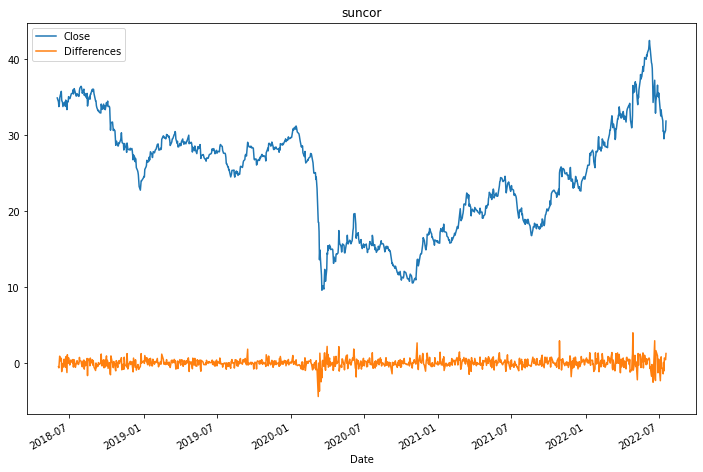

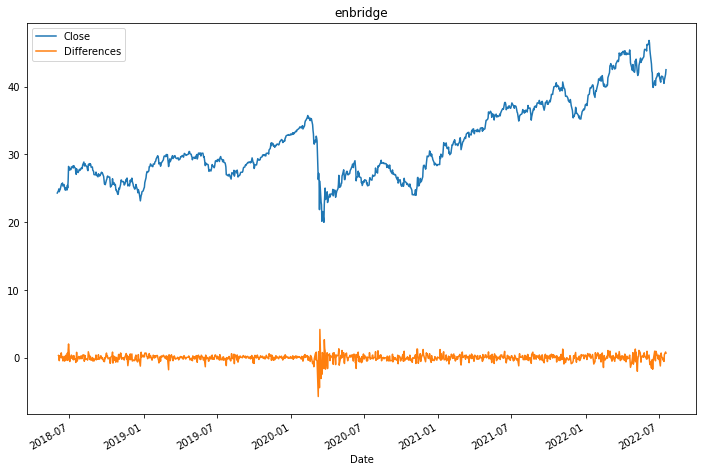

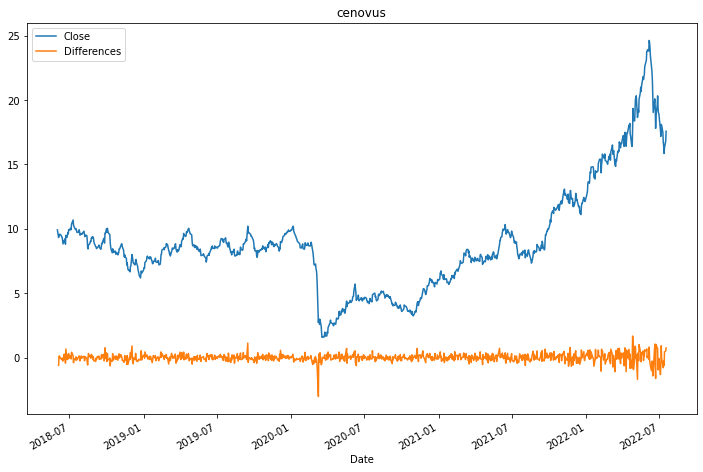

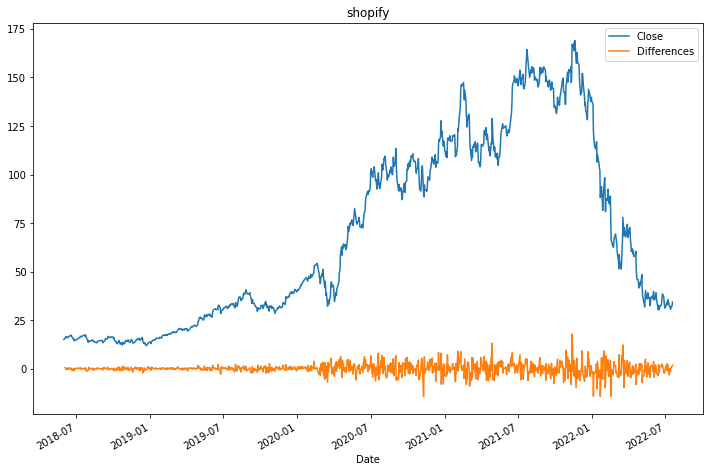

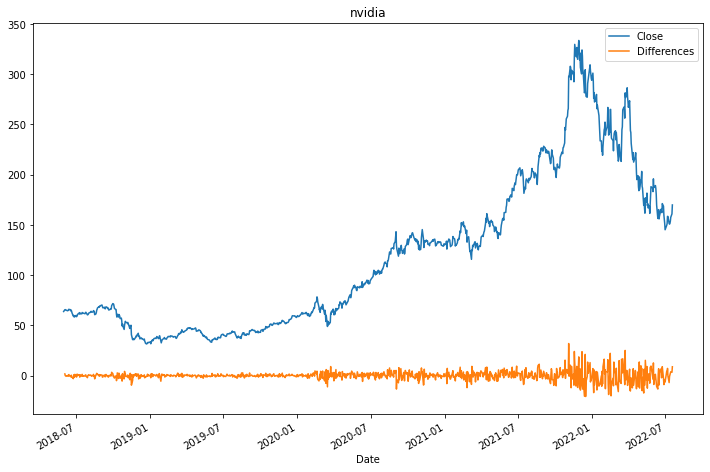

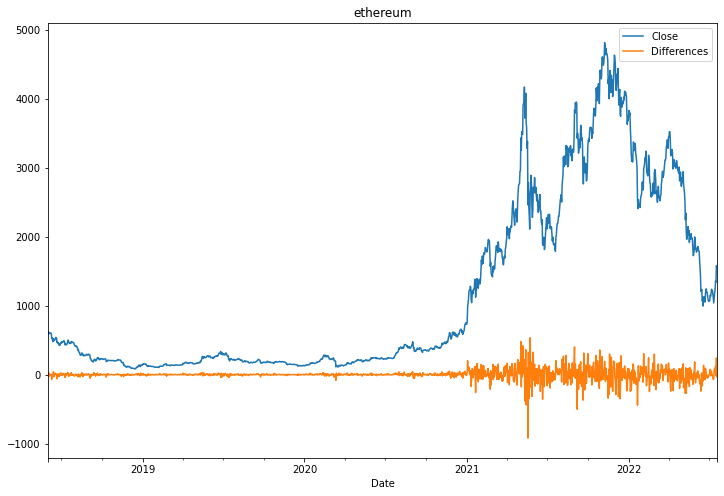

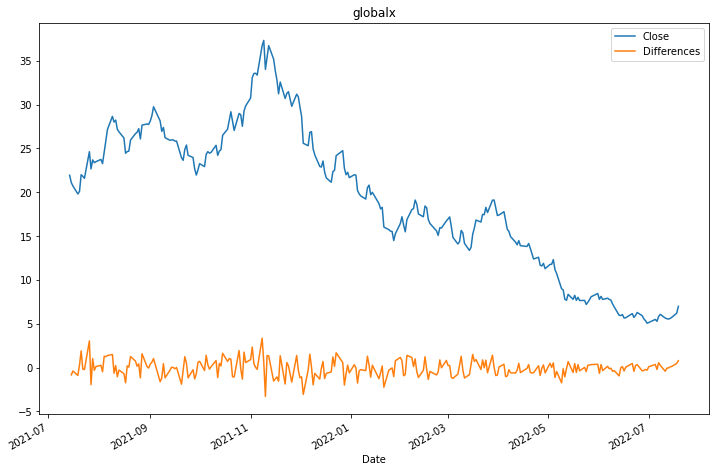

In [20]:
stock_dfs = [suncor_df, enbridge_df, cenovus_df, shopify_df, nvidia_df, ethereum_df, globalx_df]
stock_dfs_names = ['suncor', 'enbridge', 'cenovus', 'shopify', 'nvidia', 'ethereum', 'globalx']

def plot_all_stock_diffs(dfs, titles):
    for i,df in enumerate(dfs):
        plot_difference_df(df, 'Close',titles[i])

plot_all_stock_diffs(stock_dfs, stock_dfs_names)


### CHECK TREND OF ECO STATION USERS

<AxesSubplot:xlabel='DateTime'>

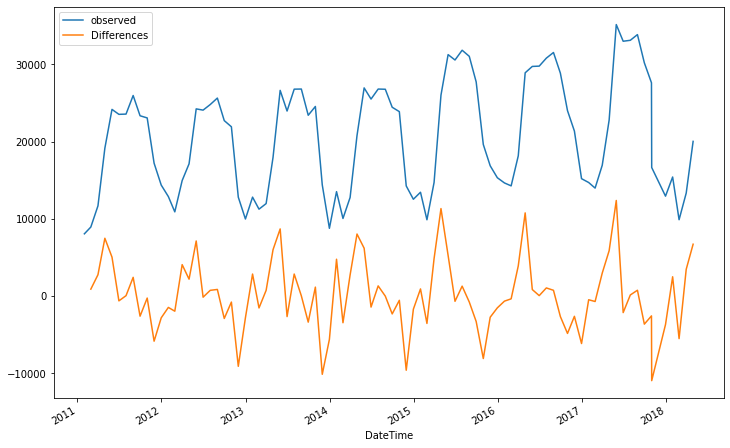

In [21]:


eco_df_dif = add_difference_col(eco_df, 'observed')
eco_df_dif.plot()

Doesn't look like it was trending, taking differences doesn't appear to have much of an effect. Likely more seasonal variation then trending.

### CHECK TREND OF WATER HEIGHT LEVELS

<AxesSubplot:xlabel='Date'>

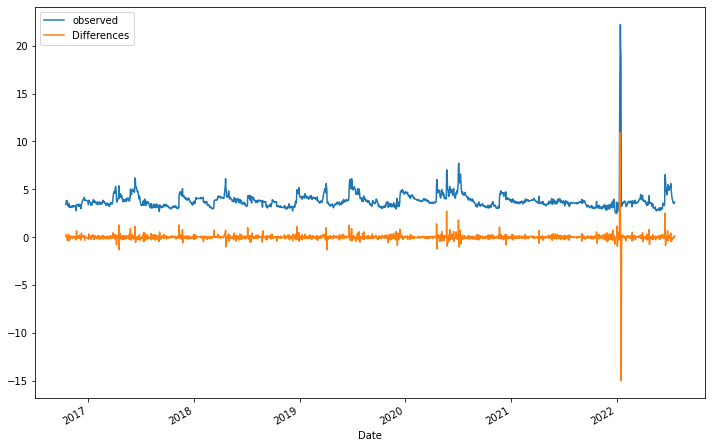

In [22]:

water_ht_df_dif = add_difference_col(water_ht_df_min, 'observed')
water_ht_df_dif.plot()

Hard to say here again, need to take a smaller sample and plot.

Looks as those this may have an effect on making the data more stationary but again difficult to say. Looks again more seasonal.

<AxesSubplot:xlabel='Date'>

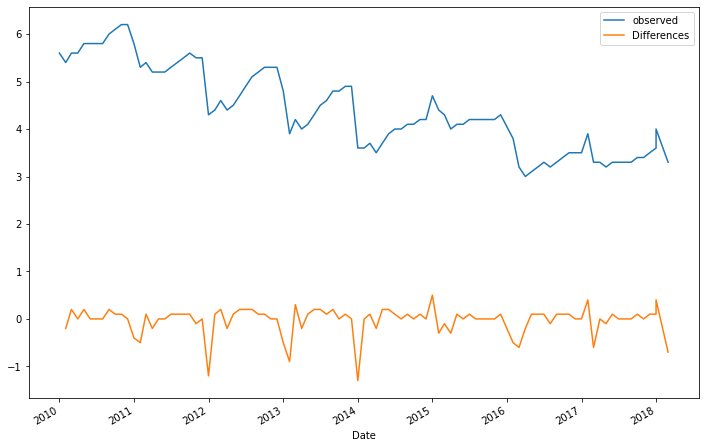

In [23]:
# CHECK TRAFFIC INJURIES FOR TRENDING DATA
traf_inj_df_dif = add_difference_col(traf_inj_df, 'observed')
traf_inj_df_dif.plot()

Looks more stationary now, removes the downward trend. Still a pattern of seasonality. 

<AxesSubplot:xlabel='Date'>

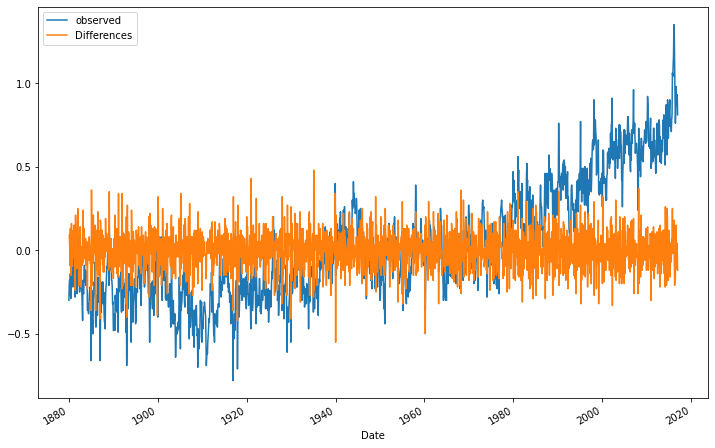

In [24]:
# CHECK GLOBAL TEMP FOR TREND
ave_temp_df_dif = add_difference_col(ave_temp_df, 'observed')
ave_temp_df_dif.plot()

Makes data look stationary. Check for exponential dif?

Plotting the observed mean temperature against the differences it's possible that there could be some rise in slope to the graph. This could be a multiplicative series. 

<AxesSubplot:xlabel='Date'>

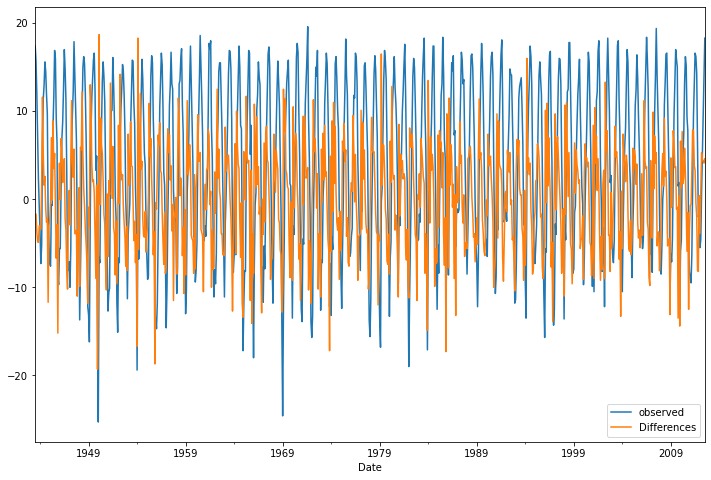

In [25]:
cgy_temp_diff = add_difference_col(cgy_temp_df, 'observed')
cgy_temp_diff.plot()

Not much of a trend in this data it would seem so differencing doesn't have much of an effect.

## Seasonality

Idea is to subtract the amount of change that just happened because of the "season"  
Procedure: 
- compute mean for whole data set
- compute mean for each seasonal timeframe (ect. each month, each day of week)
- compute offset for each month = mean(month) - mean(total)
- create new series = value - offsets

Check atco for seasonality

### Calculate Season Means

In [26]:
# compute the means for each season
# takes the data frame, the column for the value, and the number of seasons (12, 4, etc.)
# returns the mean for each season
def get_season_means(df, column, num_seasons):
    season_sum = [0]*num_seasons
    season_count = [0]*num_seasons
    season_mean = [0]*num_seasons
    # use running totals to get monthly sum and monthly count
    for i, value in enumerate(df[column]):
        season_sum[i % num_seasons] += df[column][i]
        season_count[i % num_seasons] += 1
    # calculate monthly avg
    for i in range(num_seasons):
        season_mean[i] = season_sum[i] / season_count[i]
    return season_mean


### Calculate Overall Mean

In [27]:
def get_overall_mean(df, column):
    mean = np.mean(df[column].values)
    return mean


### Calculate Season Offsets

In [28]:
def get_season_offsets(mean, season_means, num_seasons):
    season_offsets = [0]*num_seasons
    for i in range(num_seasons):
        season_offsets[i] = season_means[i] - mean
    return season_offsets


### Calculate Seasonally Adjusted Data
Use offsets to calculate seasonally offset data and create a new column in the DF

In [29]:
def get_seasonally_adj_values(df, column, offsets):
    new_df = df.copy()
    seasonally_adj = []
    num_seasons = len(offsets)
    for i, val in enumerate(df[column]):
        seasonally_adj.append( val - offsets[i % num_seasons])
    new_df.insert(1, 'seasonal_adjusted', seasonally_adj)
    return new_df


In [30]:
### Bring it all together in one function

def get_seasonal_adj_df(df, column, num_seasons):
    season_means = get_season_means(df,column, num_seasons)
    overall_mean = get_overall_mean(df, column)
    offsets = get_season_offsets(overall_mean, season_means, num_seasons)
    adj_df = get_seasonally_adj_values(df, column, offsets)
    return adj_df

### Test Seasonal Dataset - Traffic Injuries station users
Can see some pretty seasonal looking data

<AxesSubplot:xlabel='Date'>

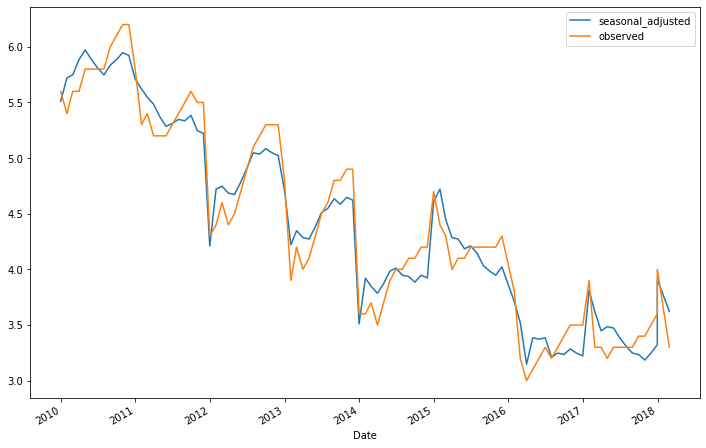

In [31]:
traf_inj_ssnl = get_seasonal_adj_df(traf_inj_df, 'observed', 12)
traf_inj_ssnl.plot(y=['seasonal_adjusted', 'observed'])

Some improvement but not much even though looks rather seasonal. 

### Monthly Eco Station Users



<AxesSubplot:xlabel='DateTime'>

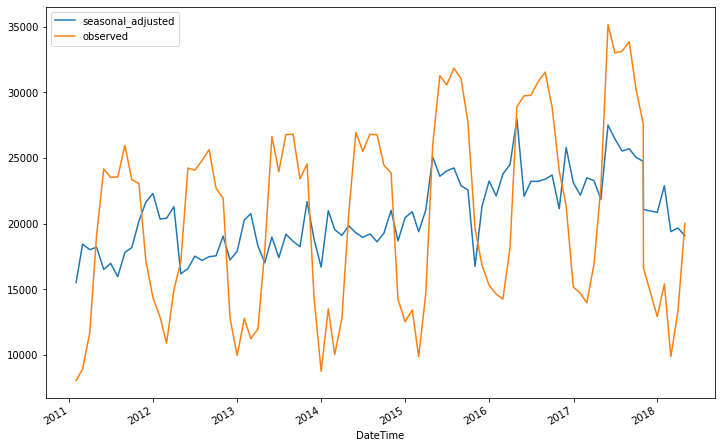

In [32]:
eco_df_ssnl = get_seasonal_adj_df(eco_df, 'observed', 12)
# eco_df_adj2.head()
eco_df_ssnl.plot(y=['seasonal_adjusted', 'observed'])

Can see some improvement, see a trend as well, generally rising. 

## Water Levels

<AxesSubplot:xlabel='Date'>

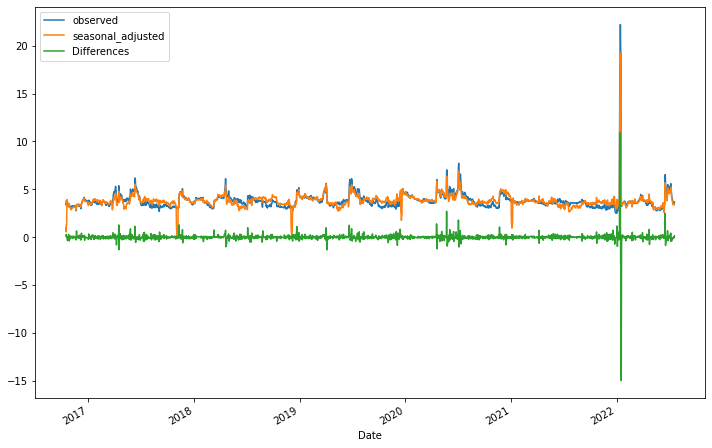

In [33]:
water_ht_df_ssnl = get_seasonal_adj_df(water_ht_df_min, 'observed', 365)
water_ht_df_ssnl.plot()

Greatly affected by the spike at the start of 2022 causing the downward spikes for the seasonal adjusted data. If we limite the data to short of the spike then get a better result. 

<AxesSubplot:xlabel='Date'>

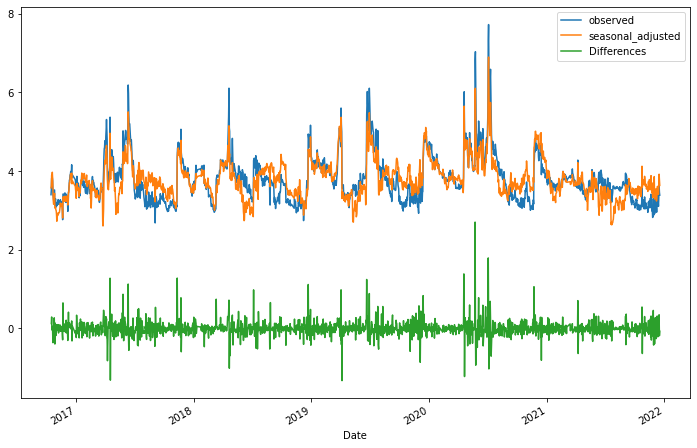

In [34]:
water_ht_df_ssnl_no_spike = get_seasonal_adj_df(water_ht_df_min.iloc[:1800], 'observed', 365)
water_ht_df_ssnl_no_spike.plot()

### Global temp seasonality

<AxesSubplot:xlabel='Date'>

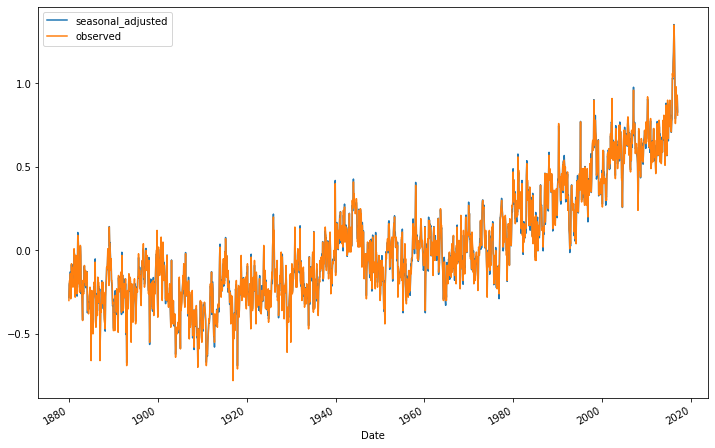

In [35]:
ave_temp_df_ssnl = get_seasonal_adj_df(ave_temp_df, 'observed', 12)
ave_temp_df_ssnl.plot(y=['seasonal_adjusted','observed'])

Not seeing much help with the seasonally adjusted data. 

### Check Calgary Temperature Data

<AxesSubplot:xlabel='Date'>

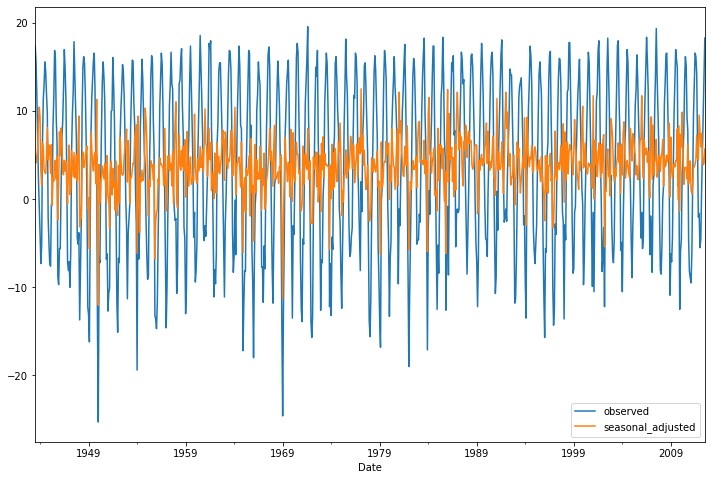

In [36]:
cgy_temp_df_ssnl = get_seasonal_adj_df(cgy_temp_df, 'observed', 12)
cgy_temp_df_ssnl.plot(y=['observed', 'seasonal_adjusted',])

Can see the seasonally adjusted data is much smoother.

# Seasonally Adjust for stock data
However stocks aren't seasonal so think I can get rid of this but can keep around for now

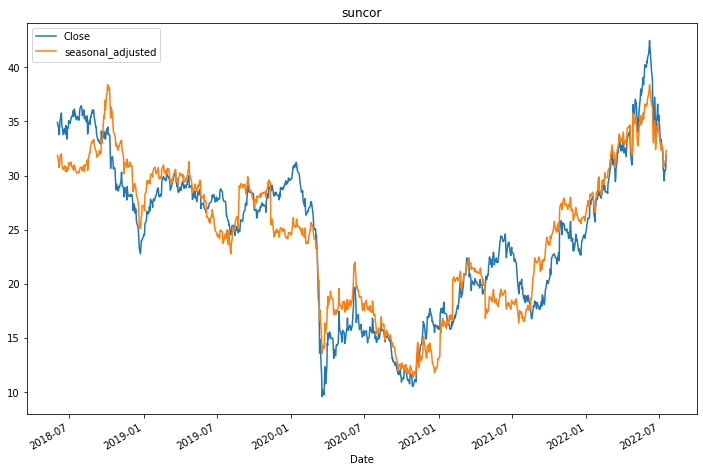

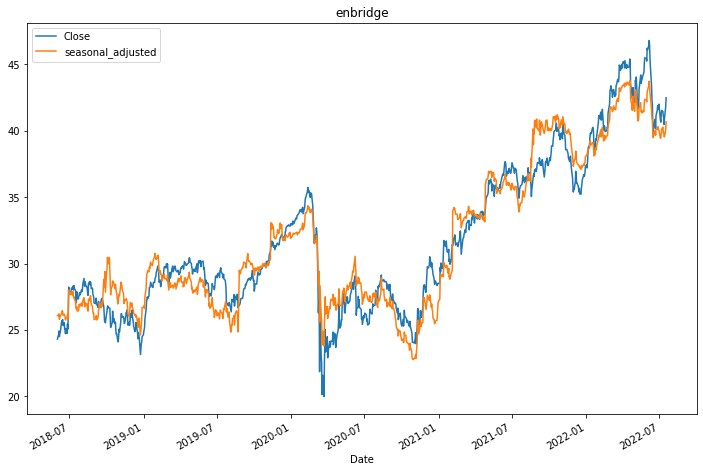

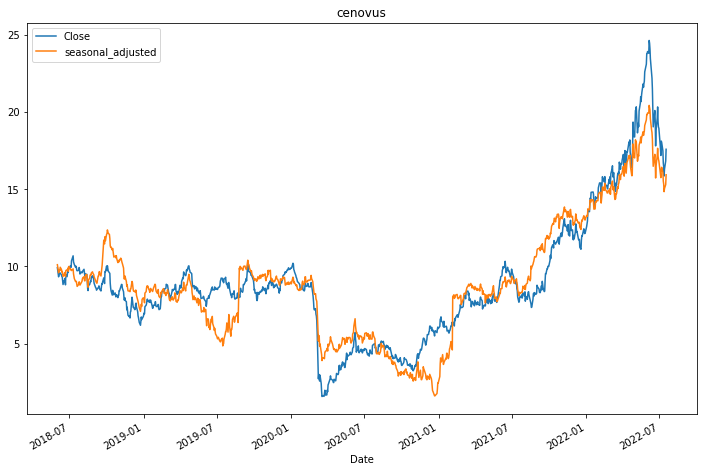

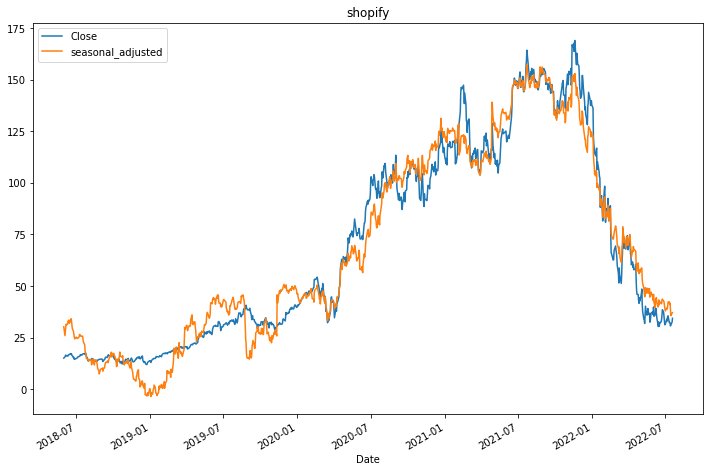

In [37]:
def plot_all_stock_ssnl(dfs, titles):
    for i,df in enumerate(dfs):
        df_ssnl = get_seasonal_adj_df(df, 'Close', 365)
        df_ssnl.plot(y=['Close', 'seasonal_adjusted',], title=titles[i])

plot_all_stock_ssnl(stock_dfs[:4], stock_dfs_names)

# cenovus_df_ssnl = get_seasonal_adj_df(cenovus_df, 'Close', 30)

# cenovus_df_ssnl.plot(y=[''])

# Multiplicative & Additive Series
In multiplicative series the seasonality increases from season to season.  
Think of next step as the product of the last two  
(Additive = next step sum of last two)

#### Check for multiplicativity:  
- make a scatter plot of the differences against the values (derivative)
- if it looks largely like a rising line => multiplicative

#### Check for Additive Series:
- make scatter plot of the differences against values (derivative)
- if looks like a flat line => additive

In [38]:
def plot_derivative(df, col):
    new_df = df.copy()
    new_df['diff'] = np.abs(new_df[col] - new_df[col].shift())
    new_df.plot.scatter(x=col, y='diff')

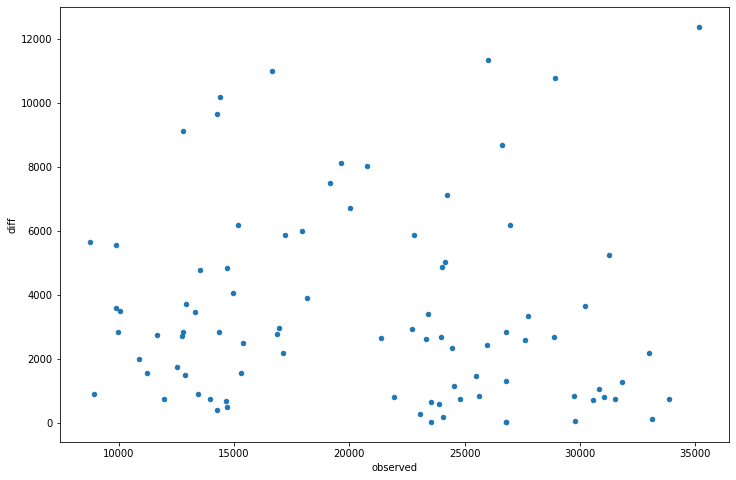

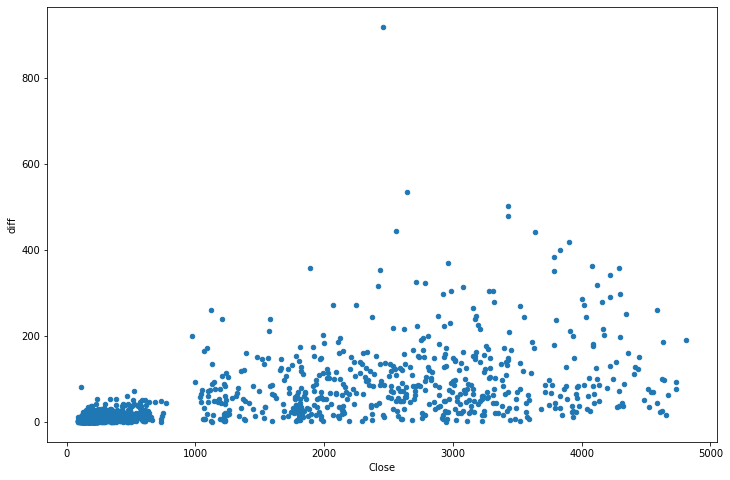

In [39]:
# can't tell much
plot_derivative(eco_df, 'observed')
#looks pretty flat
# plot_derivative(traf_inj_df, 'observed')
# plot_derivative(ave_temp_df, 'observed')
# plot_derivative(cgy_temp_df, 'observed')
plot_derivative(ethereum_df, 'Close')

All the series look fairly flat.

### To deal with multiplicative series use the logs of the value.

In [40]:
def get_log_diff(df, col):
    new_df = df.copy()
    new_df['log_val'] = np.log(new_df[col])
    new_df['log_diff'] = np.abs(new_df['log_val'] - new_df['log_val'].shift())
    new_df.plot.scatter(x='log_val', y='log_diff')
    return new_df

Now the log of the value looks additive instead of multiplicative.

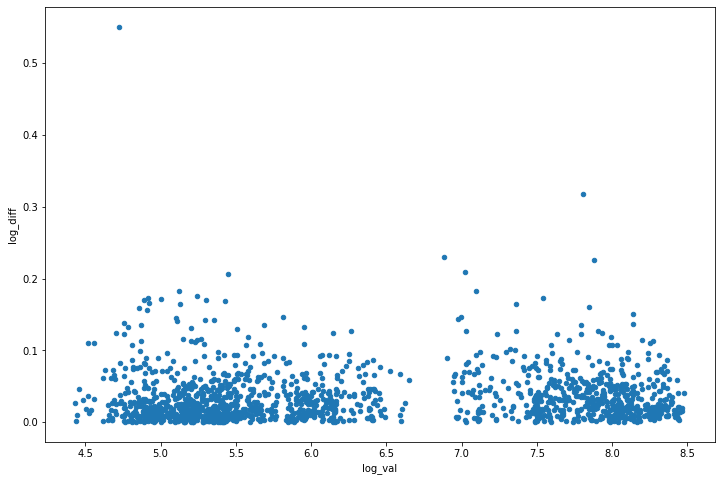

In [41]:
ethereum_df_log = get_log_diff(ethereum_df, 'Close')

## Predictions
### Naive Predictions

In [42]:


def get_naive_pred(df, column, cycle_length=1):
    df['naive_pred'] = df[column].shift(cycle_length)
    error = assess_predictions(df, column, 'naive_pred')
    return error

def plot_naive_pred(df):
    df.plot(y=['observed', 'naive_pred'])

def assess_predictions(df, obs_col, pred_col):
    total_error_sqr = 0
    total_predicted = 0
    predictions = df[pred_col]
    values = df[obs_col]
    for value, prediction in zip(values, predictions):
        if prediction is not None:
            if prediction > 0:
                total_error_sqr += (prediction-value)**2
                total_predicted += 1
    result = total_error_sqr / total_predicted
    return float(result)

In [43]:
all_datasets = [suncor_df, cenovus_df, shopify_df, nvidia_df, ethereum_df, globalx_df, traf_inj_df, water_ht_df_min, eco_df,ave_temp_df, cgy_temp_df]
all_datasets_names = ['suncor_df', 'cenovus_df', 'shopify_df', 'nvidia_df', 'ethereum_df', 'globalx_df', 'traf_inj_df', 'water_ht_df_min', 'eco_df','ave_temp_df', 'cgy_temp_df']

def get_naive_pred_errors(dfs, names):
    for i, df in enumerate(dfs):
        error = 0
        if 'observed' in df.columns:
            error = get_naive_pred(df,'observed')
        else: 
            error = get_naive_pred(df,'Close')
        print('Naive Error: %s - %.08f' %(names[i], error) )
        
get_naive_pred_errors(all_datasets, all_datasets_names)

Naive Error: suncor_df - 0.38241846
Naive Error: cenovus_df - 0.09767371
Naive Error: shopify_df - 8.62946258
Naive Error: nvidia_df - 23.07941931
Naive Error: ethereum_df - 6998.89668552
Naive Error: globalx_df - 0.88749424
Naive Error: traf_inj_df - 0.08216495
Naive Error: water_ht_df_min - 0.23985577
Naive Error: eco_df - 20710623.17241379
Naive Error: ave_temp_df - 0.01571238
Naive Error: cgy_temp_df - 31.45949219


### Naive Seasonal

In [44]:
ssnl_datasets = [traf_inj_df, eco_df,ave_temp_df, cgy_temp_df, water_ht_df_min]
ssnl_datasets_names = ['traf_inj_df', 'eco_df','ave_temp_df', 'cgy_temp_df', 'water_ht_df_min']

def get_naive_seasonal_errors(dfs, names, cycle_length):
    for i, df in enumerate(dfs):
        error = get_naive_pred(df, 'observed', cycle_length)
        print('Seasonal Naive Error: %s - %0.8f' %(names[i], error))


In [45]:
get_naive_seasonal_errors(ssnl_datasets, ssnl_datasets_names, 12)

Seasonal Naive Error: traf_inj_df - 0.33558140
Seasonal Naive Error: eco_df - 7421577.51315789
Seasonal Naive Error: ave_temp_df - 0.03801343
Seasonal Naive Error: cgy_temp_df - 8.15990099
Seasonal Naive Error: water_ht_df_min - 1.60655993


### Averages Predictions

In [46]:
def get_diff_ave (df, col, p):
    differences = df[col] - df[col].shift()
    pred_of_diff = 1/p * ( differences.cumsum().shift(1) - differences.cumsum().shift(p+1) )
    df['ave_pred'] = pred_of_diff.shift(1) + df[col].shift()
    error = assess_predictions(df, col, 'ave_pred')
    return error


def get_diff_ave_errors(dfs, names, p):
    for i, df in enumerate(dfs):
        error = 0
        if 'observed' in df.columns:
            error = get_diff_ave(df,'observed', p)
        else: 
            error = get_diff_ave(df,'Close', p)
        print('Average Error: %s - %.03f' %(names[i], error) )


In [47]:
get_diff_ave_errors(all_datasets, all_datasets_names, 3)

Average Error: suncor_df - 0.475
Average Error: cenovus_df - 0.127
Average Error: shopify_df - 11.791
Average Error: nvidia_df - 30.219
Average Error: ethereum_df - 8722.192
Average Error: globalx_df - 1.173
Average Error: traf_inj_df - 0.121
Average Error: water_ht_df_min - 0.333
Average Error: eco_df - 32055416.019
Average Error: ave_temp_df - 0.019
Average Error: cgy_temp_df - 43.161


In [48]:
# get_diff_ave_errors(all_datasets, all_datasets_names, 8)
get_diff_ave_errors(all_datasets, all_datasets_names, 12)

Average Error: suncor_df - 0.409
Average Error: cenovus_df - 0.105
Average Error: shopify_df - 9.482
Average Error: nvidia_df - 24.860
Average Error: ethereum_df - 7554.362
Average Error: globalx_df - 0.913
Average Error: traf_inj_df - 0.092
Average Error: water_ht_df_min - 0.276
Average Error: eco_df - 22737741.730
Average Error: ave_temp_df - 0.016
Average Error: cgy_temp_df - 31.738


## Regression



In [49]:
import math 
# values is training set vector
# order = the p
# @ symbol effictively is multiplying matrices
# linalg.inv = linear algebra.inverse

def train_ar(values, order):
    # y, training data without first order p
    target_vector = np.array(values[order:])
    lagged_values = []

    # build design matrix
    for i in range(len(values) - order):
        lagged_values.append(values[i: i+order])
    design_matrix = np.array(lagged_values)
    return np.linalg.inv(design_matrix.transpose() @ design_matrix) @ design_matrix.transpose() @ target_vector

# coeffs = array of coefficients, length = p
# values = dataset predicting off of
def predict(coeffs, values):
    # create init array of nan's with length of len(coeffs)
    predicted_vals = [math.nan] * len(coeffs)

    #every time go through loop append new prediction

    for i in range(len(coeffs), len(values)):
        # prediction = linear combination of coefficients and the last 'p' values
        # moving window of 'p' things for dot product
        predicted_vals.append(np.dot(coeffs, values[i-len(coeffs):i]))
    # return predicted values array
    return np.array(predicted_vals)




### Try with a few datasets
- Suncor
- Nvidia
- Log Ethereum




MSE:  16489.548400838805  
Standard Deviation:  128.41163654762292


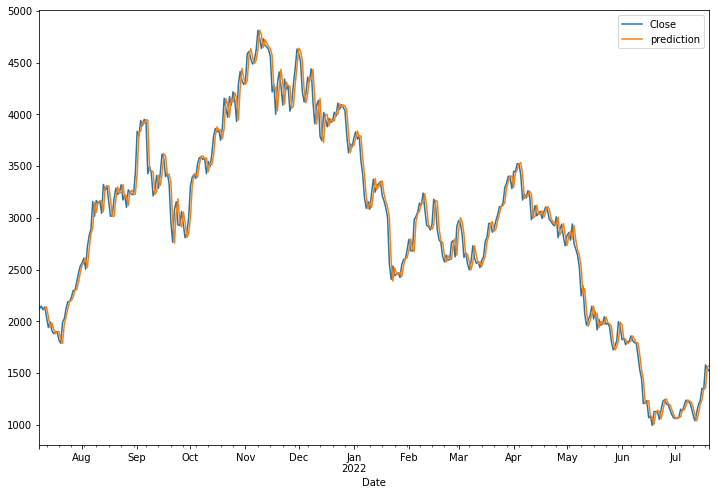

In [50]:
def get_training_set(df, col, log):
    length = round(len(df.index)*0.75)
    if log == True:
        df_train = np.log(df.iloc[:length][col])
    else:
        df_train = df.iloc[:length][col]
    return df_train, length

def get_predicted_set(df_test, coeffs, log):
    if log == True:
        log_predicted = predict(coeffs, np.log(df_test))
        df_test = df_test.to_frame()
        df_test['prediction'] = np.exp(log_predicted)
    else:
        predicted = predict(coeffs, df_test)
        df_test = df_test.to_frame()
        df_test['prediction'] = predicted
    df_test.dropna()
    return df_test
    
def get_test_set(df, col, length):
    return df.iloc[length:][col]

def autoregress(df, col, p, log=False):

    df_train, length = get_training_set(df, col, log)

    coeff_test = train_ar(df_train, p)
    # test data
    df_test = get_test_set(df, col, length)

    df_test = get_predicted_set(df_test, coeff_test, log)

    mse = assess_predictions(df_test, col, 'prediction')
    std = math.sqrt(mse)

    print('MSE: ', mse, ' \nStandard Deviation: ', std)
    df_test.plot()
    return

autoregress(ethereum_df, 'Close', 3, True)



MSE:  74.76085974854682  
Standard Deviation:  8.646436245560759


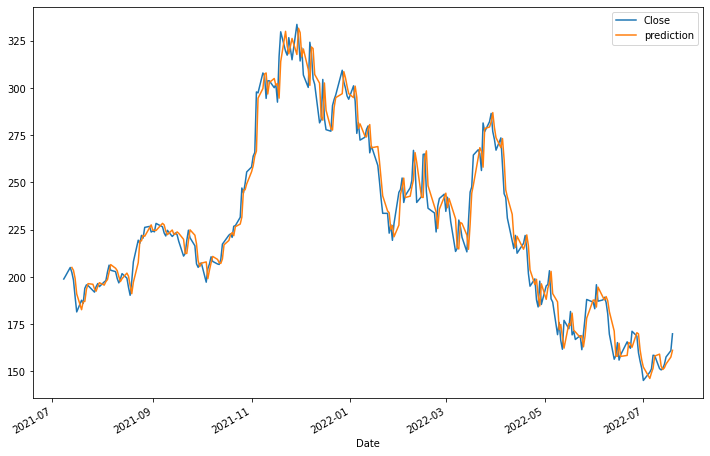

In [51]:
autoregress(nvidia_df, 'Close', 3)

MSE:  0.625583821931402  
Standard Deviation:  0.7909385702640895


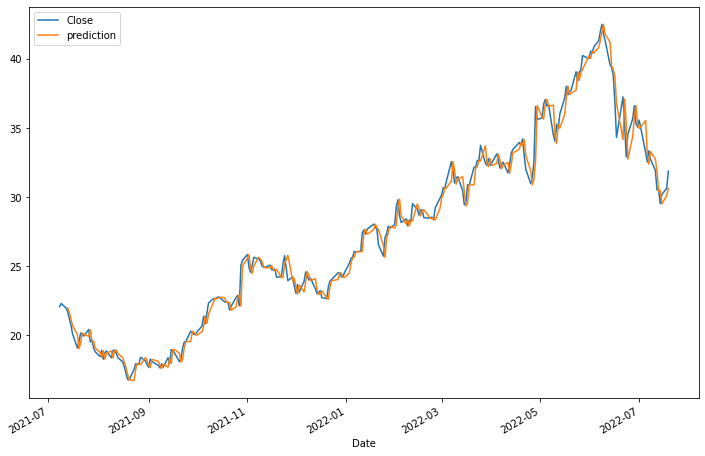

In [52]:
autoregress(suncor_df, 'Close', 3, False)

### PACF

In [53]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf

In [54]:
def plot_pacf_df(df, col, log=False):
    train_df, length = get_training_set(df, col, log)
    fig = plt.figure(figsize=(12,8))
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(train_df, lags=15, ax=ax2)

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


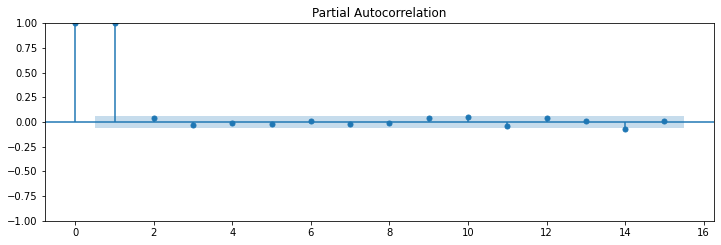

In [55]:
plot_pacf_df(ethereum_df, 'Close', True)

MSE:  15978.470297283327  
Standard Deviation:  126.40597413604836


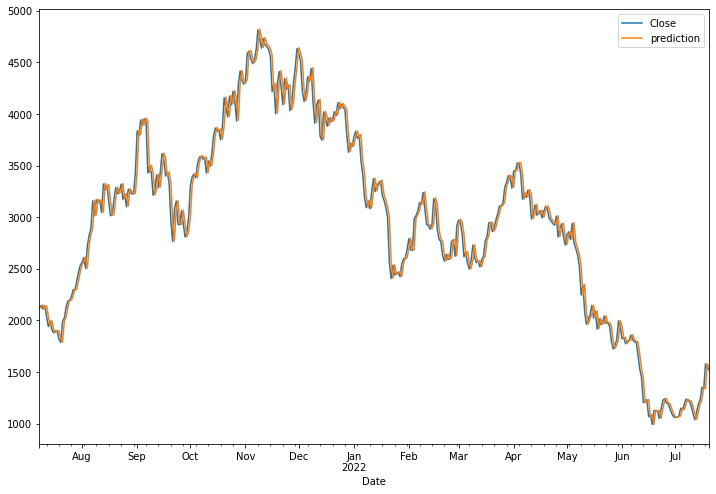

In [56]:
autoregress(ethereum_df, 'Close', 1, True)

MSE:  0.6220739288036504  
Standard Deviation:  0.7887166340350953


c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


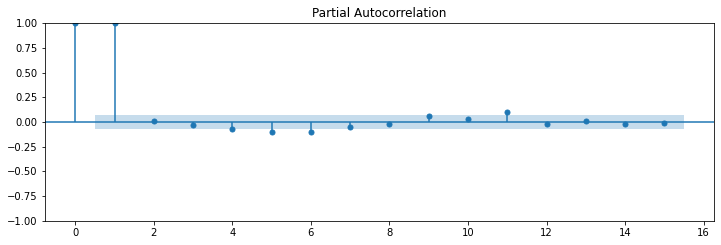

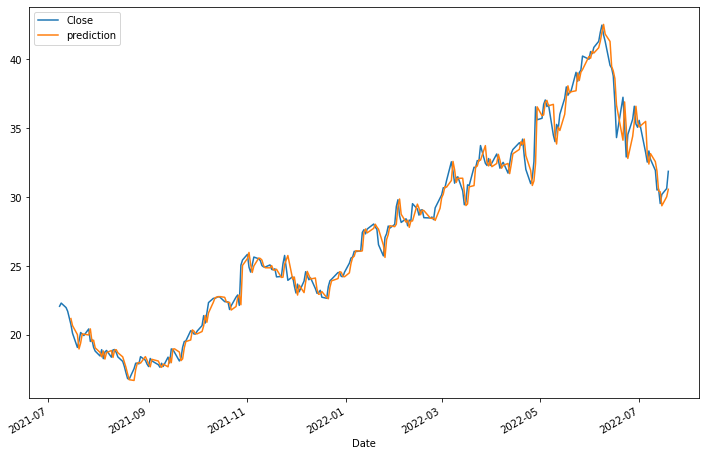

In [57]:
plot_pacf_df(suncor_df, 'Close')
autoregress(suncor_df, 'Close', 5, False)


MSE:  10561956.037745783  
Standard Deviation:  3249.9163124218726


c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


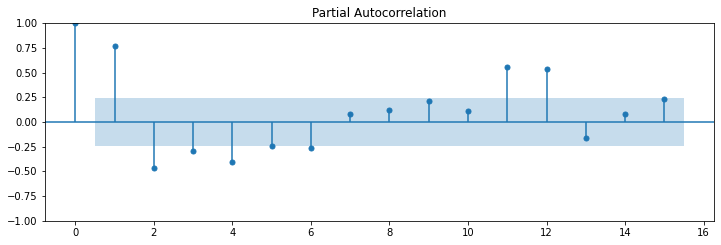

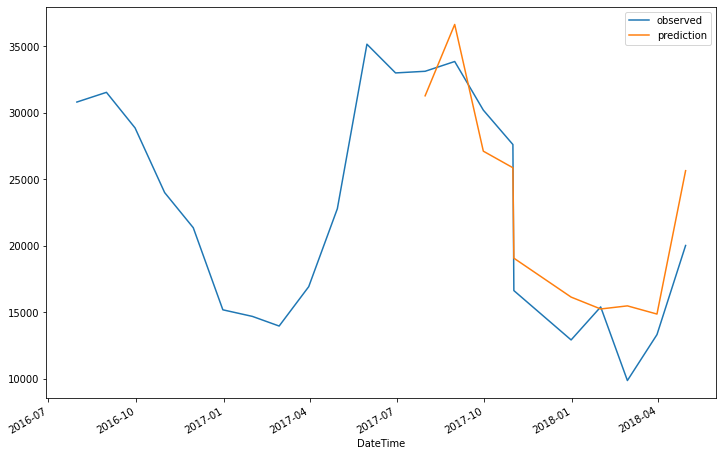

In [58]:
plot_pacf_df(eco_df, 'observed', False)
autoregress(eco_df, 'observed', 12, False)

### Simulated Trading - Ethereum

Value Gain or Loss: $ -484.4999205069489


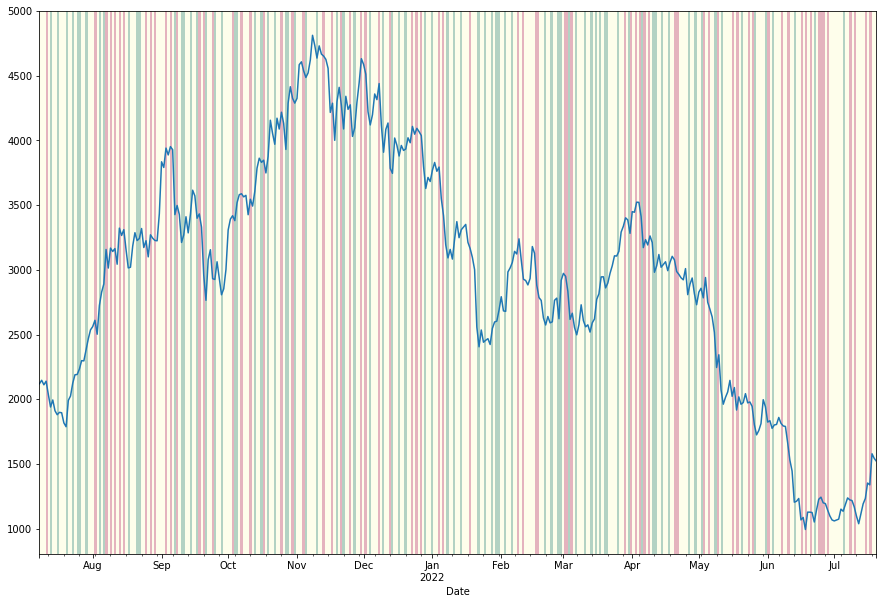

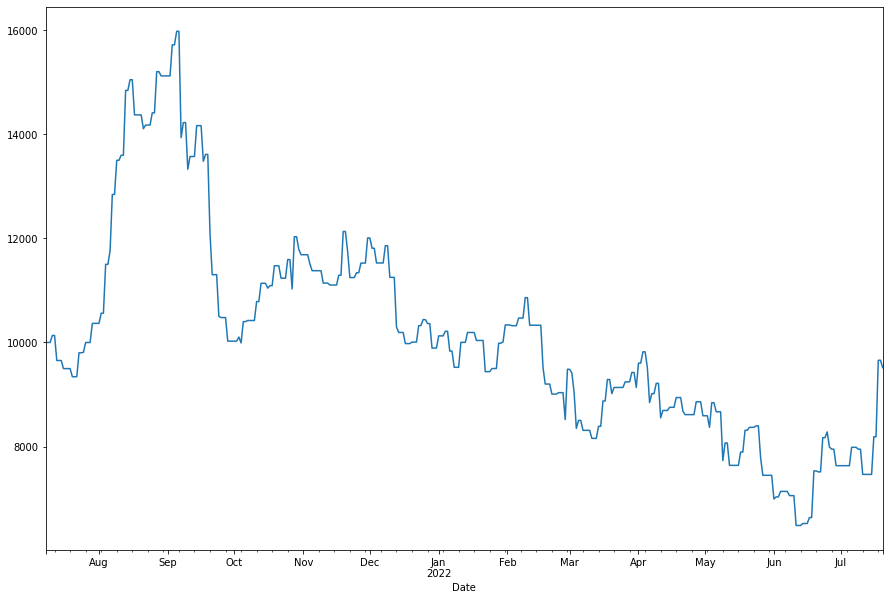

In [59]:
# create new column 'is_holding'
# if prediction is more than 1.05 times last close then hold, otherwise sell

def simulate_trading(df, col, hold_rate, p=3, log=False):
    df_train, length = get_training_set(df, col, log)

    df_test = get_test_set(df, col, length)


    coeff_test = train_ar(df_train, p)
    # test data
    df_test = get_test_set(df, col, length)

    df_test = get_predicted_set(df_test, coeff_test, log)    

    df_test['is_holding'] = df_test['prediction'] > df_test[col].shift()*hold_rate

    last_price = None

    portfolio_value = 10000
    values = []

    for ts, (close, _, is_holding) in df_test.iterrows():
        # if holding recalculate how value of portfolio
        # take money used to have and multiply it by new close / last price
        # if last price = close then no change in value
        if is_holding:
            portfolio_value *= close / last_price
        # set new last_price
        last_price = close
        # add to list of portfolio values
        values.append(portfolio_value)

    df_test['EquityValue'] = values


    offsets = (df_test['is_holding'] * (df_test[col].shift(-1) - df_test[col]))

    has_increased = ((df_test[col].shift(-1) > df_test[col]) & df_test['is_holding']).astype(int)
    has_decreased = ((df_test[col].shift(-1) < df_test[col]) & df_test['is_holding']).astype(int)

    plt.rcParams['figure.figsize'] = [15, 10]
    ax = df_test[col].plot()
    offset_start = has_increased.index[0].timestamp() / 24 / 60 / 60
    offset_end = has_increased.index[-1].timestamp() / 24 / 60 / 60
    ax.pcolorfast((offset_start, offset_end), ax.get_ylim(), (has_increased - has_decreased).values[np.newaxis], cmap='RdYlGn', alpha = 0.3)

    plt.figure()
    df_test['EquityValue'].plot()
    print('Value Gain or Loss: $', df_test['EquityValue'][-1] - 10000)
    return 

eth_df_trade_sim = simulate_trading(ethereum_df, 'Close', 1.003, p=3, log=True)


Value Gain or Loss: $ 4829.004478167059


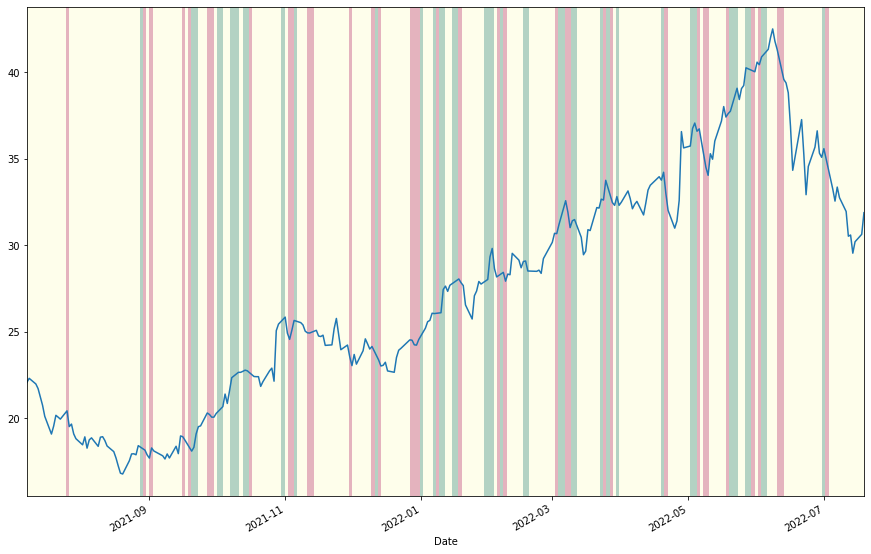

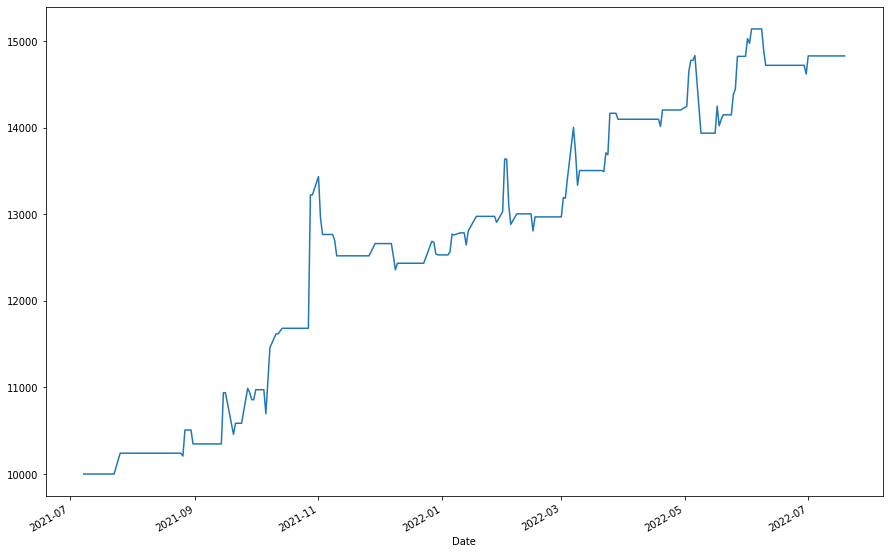

In [60]:
simulate_trading(suncor_df, 'Close', 1.0004, 5, False)
# simulate_trading(suncor_df, 'Close', 1.005, 5, False)

# Monte Carlo Analyses

### Suncor & Ethereum

AR Coeffs: [-0.06810878463108047, -0.001932501099691477, 0.06937868884041282, -0.00032658361671254743, 1.0005385846087966]
Standard Deviation:  0.6153406647380016
(100, 110)
0.27
0.5
0.23


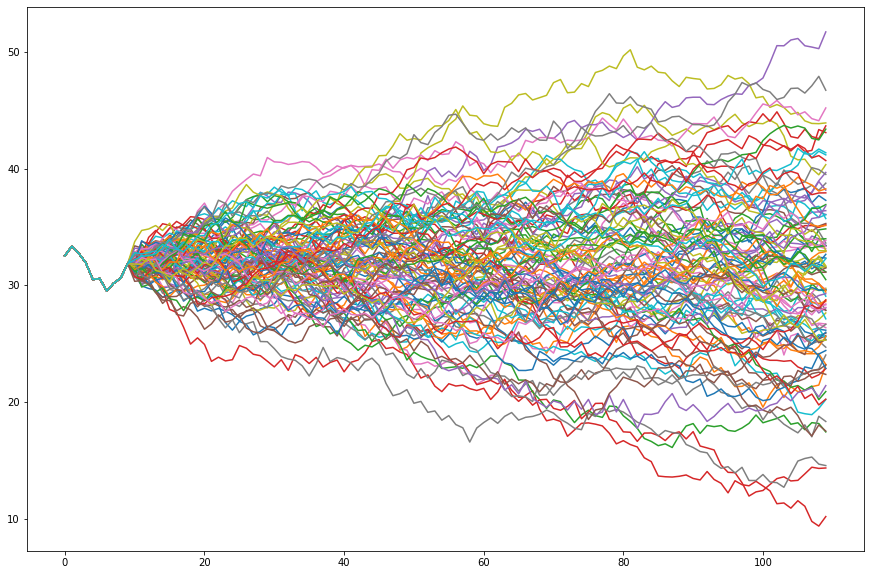

In [104]:
def rmse(predicted, actual):
    diffs = predicted - actual
    return math.sqrt(np.mean(diffs ** 2))

def monte_carlo_sim(df, col, p, num_samples, trajectory_length):
    # create AR model
    model = sm.tsa.AutoReg(df[col].reset_index()[col], p, trend='n').fit()
    
    # get AR coeffs
    coeffs = list(reversed(model.params))
    print('AR Coeffs:', coeffs)

    # calc standard deviation from predictions
    std_dev = rmse(model.predict(), df[col].reset_index()[col])
    print('Standard Deviation: ',std_dev)

    # get initial values, last 10 values
    initial_values = np.array(df[col][-10:]).reshape(1,-1)
    # print(initial_values)

    # create start of trajectories - all start with same init values
    # COLUMNS will be the number of init values
    # ROWS number of samples/trajectories 
    values = np.broadcast_to(initial_values, (num_samples, 10))
    # print('VALUES: ',values)

    # iterate each step for total trajectory length
    for i in range(trajectory_length):
        # next pred = last p values * AR(p) coefficients
        next_prediction = values[:,-p:] @ coeffs
        # next column
        next_column = next_prediction + std_dev * np.random.randn(num_samples)
        values = np.append(values, next_column.reshape(num_samples, 1), axis=1)
    print(values.shape)
    # print('NEW VALUES: ', values)
    _=plt.plot(values.transpose())
    
    return values, next_column


suncor_mc_vals, suncor_mc_next_col = monte_carlo_sim(suncor_df, 'Close', 5, 100, 100)


def prob_above(values, marker):
    count = np.count_nonzero((values > marker))
    return count/values.size

def prob_below(values, marker):
    count = np.count_nonzero((values < marker))
    return count/values.size

def prob_between(values, low, high):
    count_low = np.count_nonzero((values < low))
    count_high = np.count_nonzero((values > high))
    return (values.size - count_low - count_high) / values.size


print(prob_above(suncor_mc_next_col, 35))
print(prob_below(suncor_mc_next_col, 30))
print(prob_between(suncor_mc_next_col, 30, 35))



AR Coeffs: [-0.05266272713931479, 0.018939130852625292, 0.0162106040312495, 0.08820379482694951, 0.928338866508507]
Standard Deviation:  531.6700959270655
(200, 60)


0.6

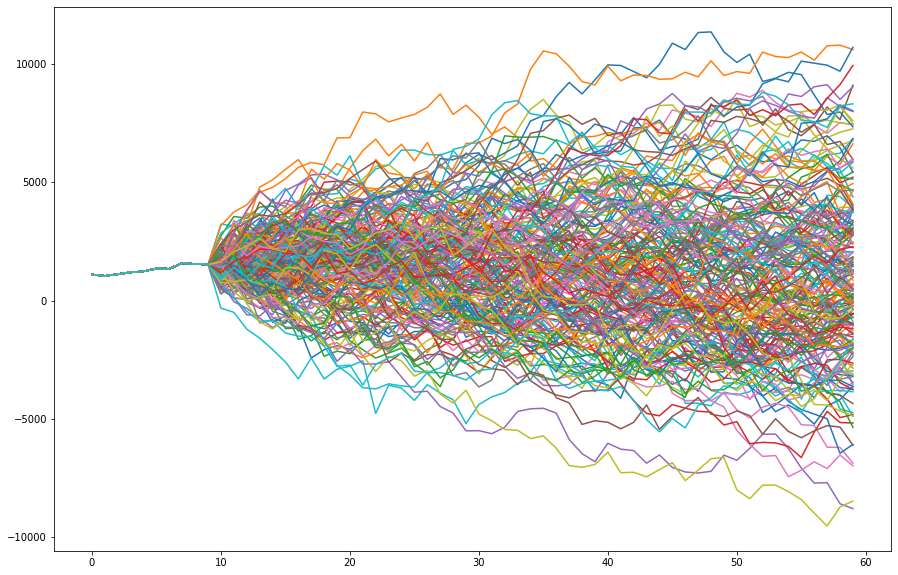

In [105]:
ether_mc_vals, eth_mc_next_col = monte_carlo_sim(ethereum_df, 'Close', 5, 200, 50)

# What is likelihood Ethereum stock stays above 0 after 50 days?

prob_above(eth_mc_next_col, 0)

# Kernal Density Functions

<AxesSubplot:ylabel='Density'>

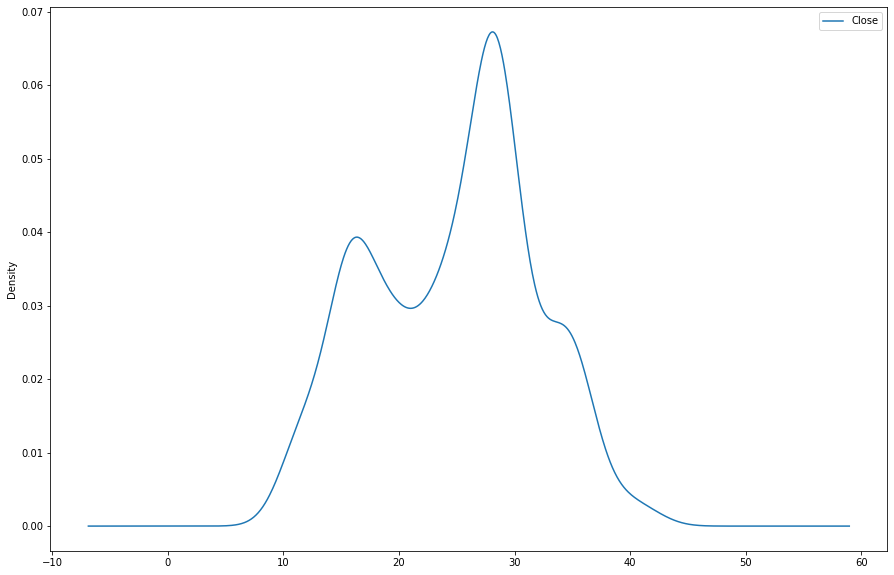

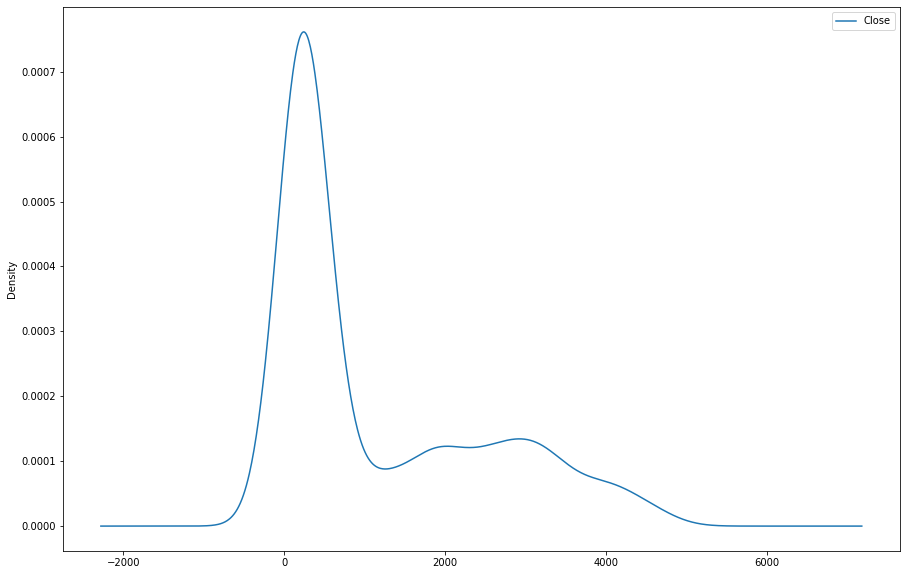

In [63]:
pd.DataFrame(suncor_df['Close']).plot.kde()
pd.DataFrame(ethereum_df['Close']).plot.kde()

# Smoothing

<AxesSubplot:xlabel='Date'>

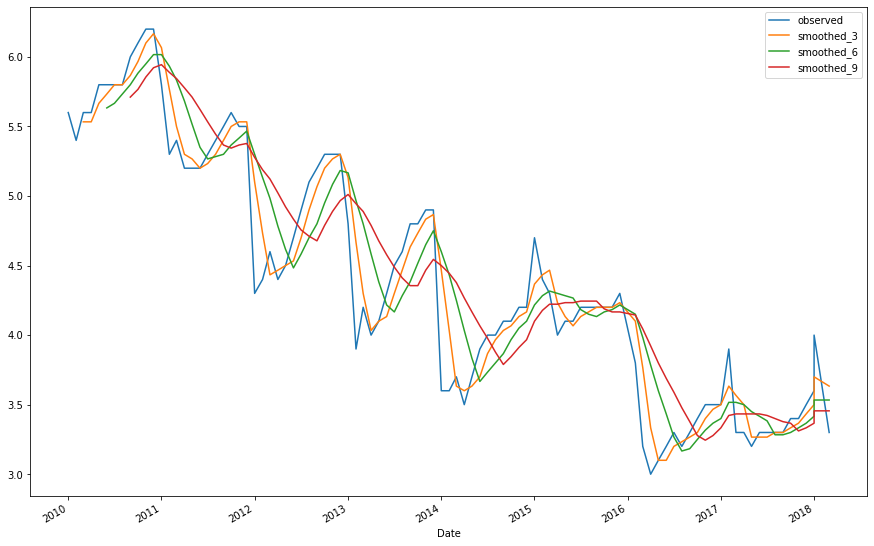

In [64]:
def ma_smooth_df(df, col, length):
    smoothed_df = pd.DataFrame(df[col])
    smoothed_df['smoothed_{}'.format(length)] = df[col].rolling(length).mean()
    return smoothed_df

traf_inj_df_sm_3 = ma_smooth_df(traf_inj_df, 'observed', 3)
traf_inj_df_sm_6 = ma_smooth_df(traf_inj_df, 'observed', 6)
traf_inj_df_sm_9 = ma_smooth_df(traf_inj_df, 'observed', 9)

traf_inj_df_sm_3['smoothed_6'] = traf_inj_df_sm_6['smoothed_6']
traf_inj_df_sm_3['smoothed_9'] = traf_inj_df_sm_9['smoothed_9']

traf_inj_df_sm_3.plot()



In [65]:
eco_sm_ma = ma_smooth_df(eco_df, 'observed', 3)

<AxesSubplot:xlabel='Date'>

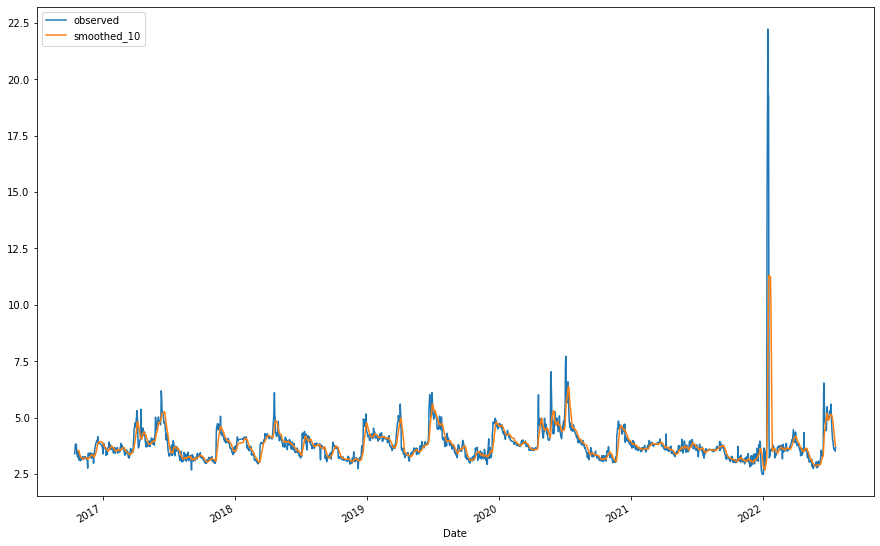

In [66]:
water_ht_df_min_sm_10 = ma_smooth_df(water_ht_df_min, 'observed', 10)
water_ht_df_min_sm_10.plot()

<AxesSubplot:xlabel='Date'>

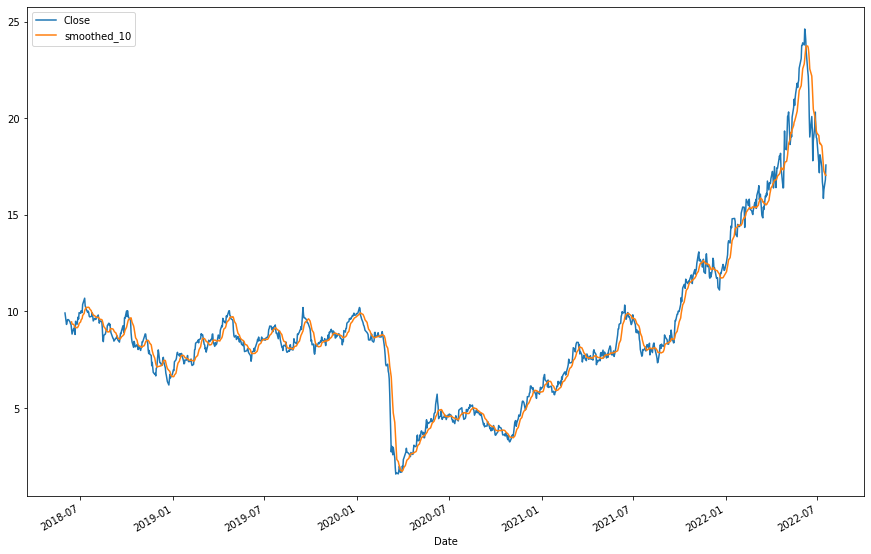

In [67]:
cenovus_df_sm_5 = ma_smooth_df(cenovus_df, 'Close', 10)
cenovus_df_sm_5.plot()

## Exponential Smoothing

<AxesSubplot:xlabel='Date'>

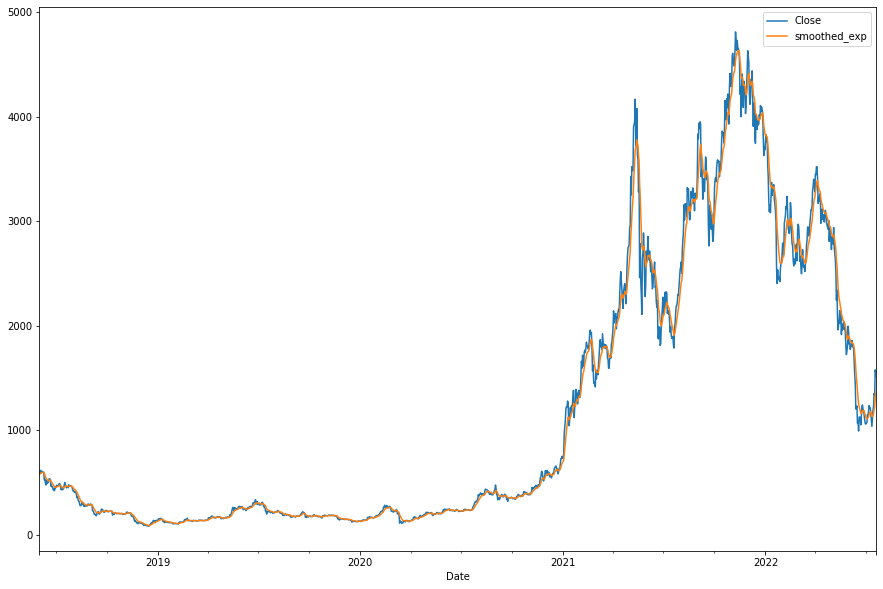

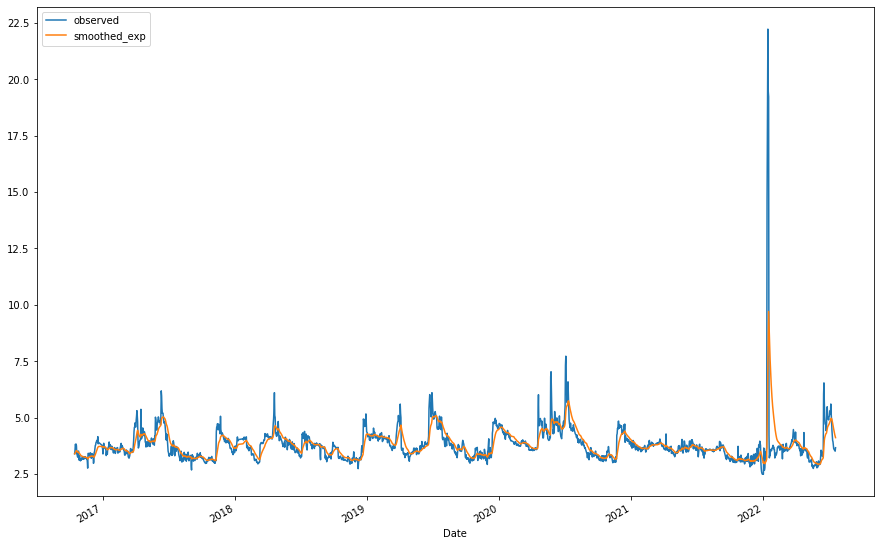

In [68]:
def exp_smooth_df(df, col, alpha):
    series = df[col]
    smoothed_value = series[0]
    results = []
    for value in series:
        smoothed_value = (1 - alpha) * smoothed_value + alpha * value
        results.append(smoothed_value)
    df['smoothed_exp'] = results
    return df

eth_exp_sm = exp_smooth_df(ethereum_df, 'Close', 0.2)
eth_exp_sm.plot(y=['Close', 'smoothed_exp'])

water_ht_df_sm = exp_smooth_df(water_ht_df_min, 'observed', 0.1)
water_ht_df_sm.plot(y=['observed','smoothed_exp'])



<AxesSubplot:xlabel='DateTime'>

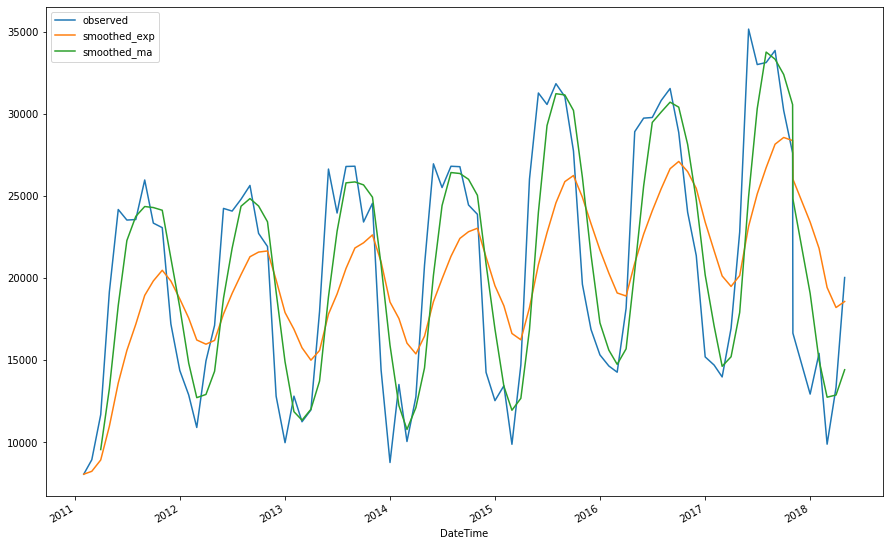

In [69]:
eco_df_ex_sm = exp_smooth_df(eco_df, 'observed', 0.2)
eco_df_ex_sm['smoothed_ma'] = eco_sm_ma['smoothed_3']

eco_df_ex_sm.plot(y=['observed','smoothed_exp', 'smoothed_ma'])

## FFT

98


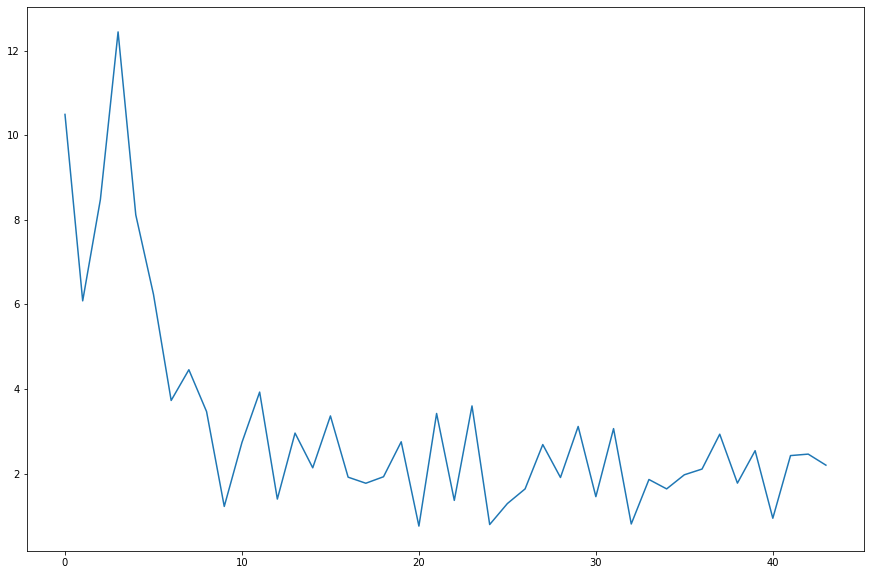

In [70]:
# start from 10 and go half way up series
def run_fft_on_df(df, col, start, end):
    df_fft = np.abs(np.fft.fft((df[col])))[start:len(df[col])//end]
    print(len(df.index))
    return df_fft

traf_inj_fft = run_fft_on_df(traf_inj_df, 'observed', 5,2)
plt.plot(traf_inj_fft)

In [71]:
# See spike at 3+5 = 8
# So period = 
98/8

12.25

2013


41.08163265306123

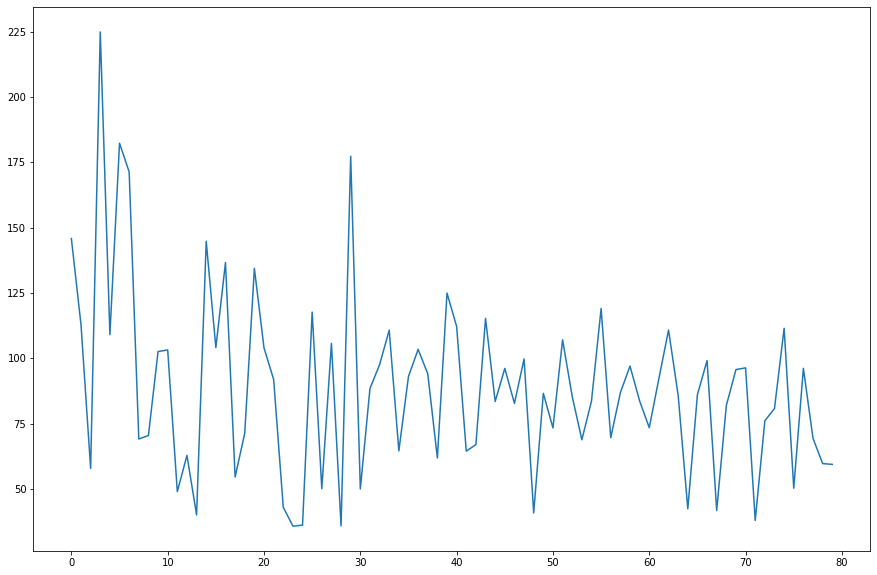

In [72]:
water_ht_min_fft = run_fft_on_df(water_ht_df_min, 'observed', 20, 20)
plt.plot(water_ht_min_fft)
# see a spike at 29 which is actually 49 as starting 20 in
# so period is 
2013/49


In [73]:
# water_ht_df_ssnl_no_spike_49 = get_seasonal_adj_df(water_ht_df_min.iloc[:1800], 'observed', 41)
get_naive_pred(water_ht_df_min, 'observed', 41)

1.8828058748174468

Spike found with FFT for the seasonality cycle of 49 days. By using this cycle lengeth the MSE of the predictions actually improved from using 365. 

829


12.014492753623188

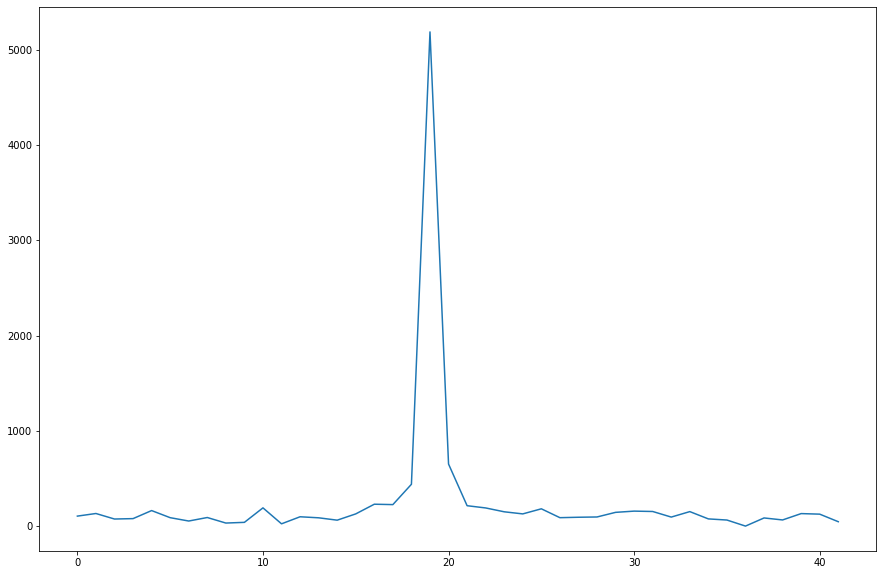

In [74]:
cgy_temp_fft = run_fft_on_df(cgy_temp_df, 'observed', 50, 9)
plt.plot(cgy_temp_fft)
# spike at 50 + 19 = 69
# period length 
829/69

Find the spike at 19+50 = 69

1644


109.6

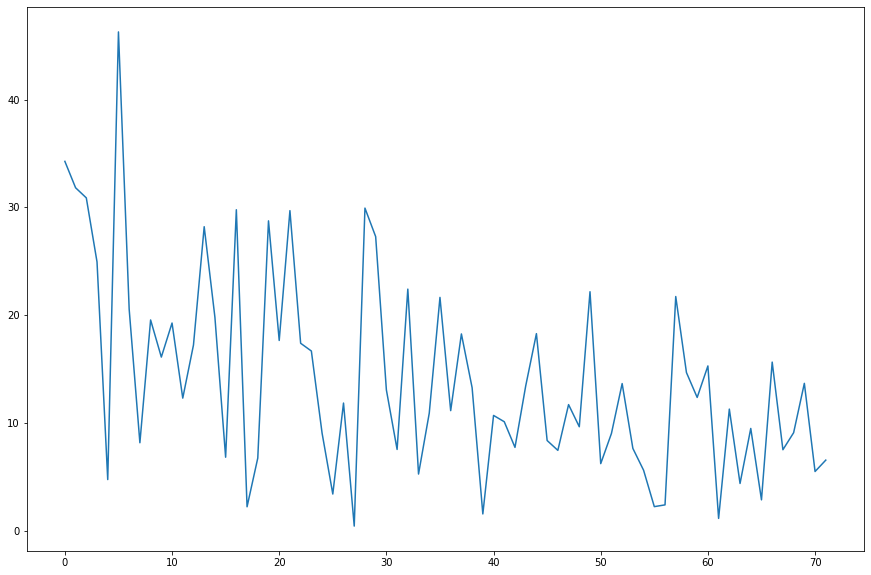

In [75]:
ave_temp_fft = run_fft_on_df(ave_temp_df, 'observed', 10, 20)
plt.plot(ave_temp_fft)
# spike at 5 + 10 = 15
# period
1644 / 15

88


12.571428571428571

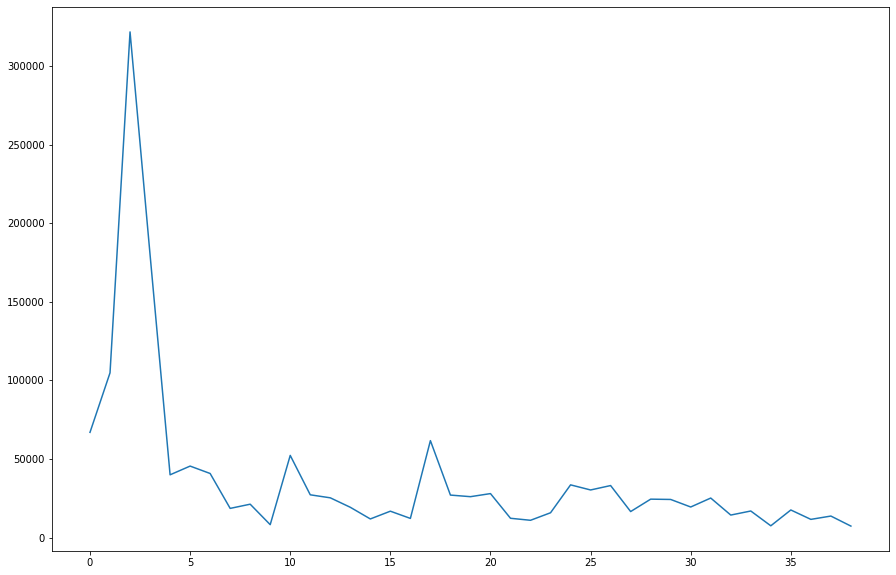

In [76]:
eco_station_fft = run_fft_on_df(eco_df, 'observed', 5, 2)
plt.plot(eco_station_fft)
# spike at 5 + 2
88/7

In [77]:
# cenovus_df_ssnl_74 = get_seasonal_adj_df(cenovus_df, 'observed', 74)
get_naive_pred(eco_df, 'observed', 12)

7421577.513157895

## Decompositions

Figure(1080x720)


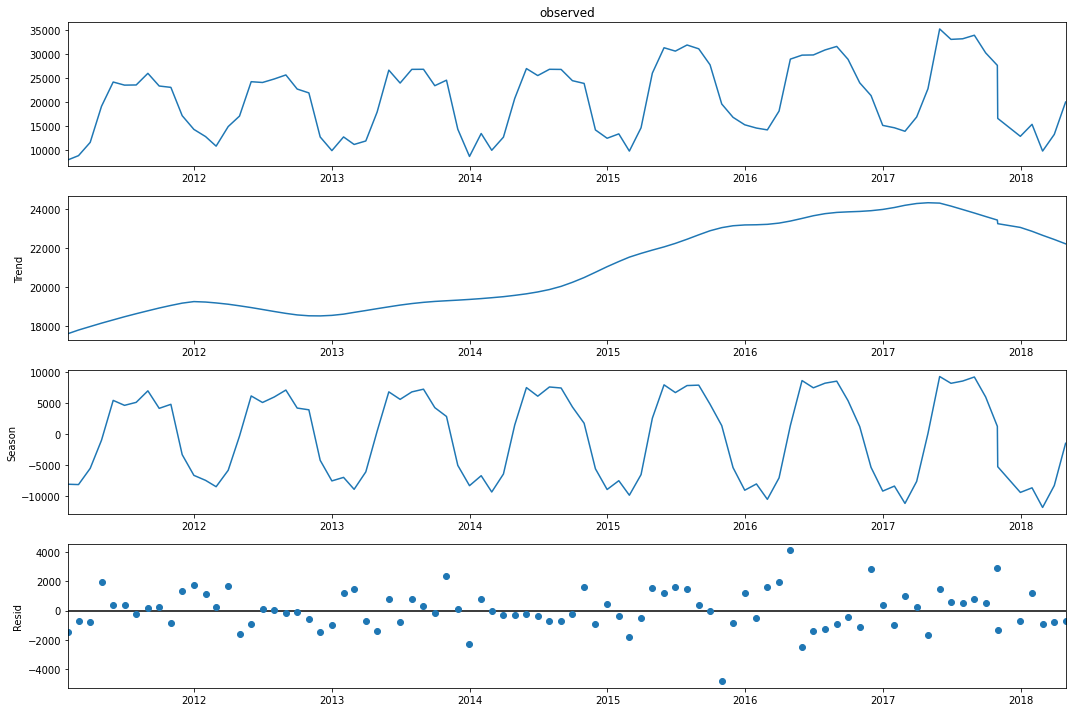

In [78]:
from statsmodels.tsa.seasonal import STL

def get_STL_decomp(df, col, period=None):
    decomp = STL(df[col], period).fit()
    return decomp

eco_decomp = get_STL_decomp(eco_df, 'observed', 12)
print(eco_decomp.plot())


Figure(1080x720)


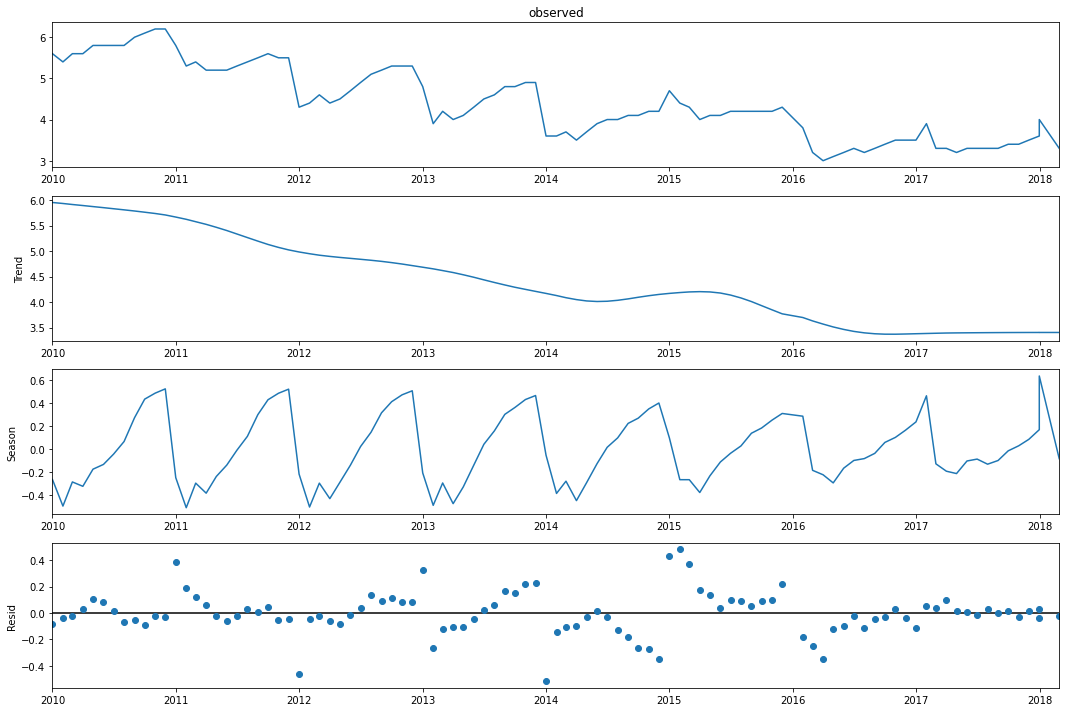

In [79]:
traf_decomp = get_STL_decomp(traf_inj_df, 'observed', 12)
print(traf_decomp.plot())

Figure(1080x720)


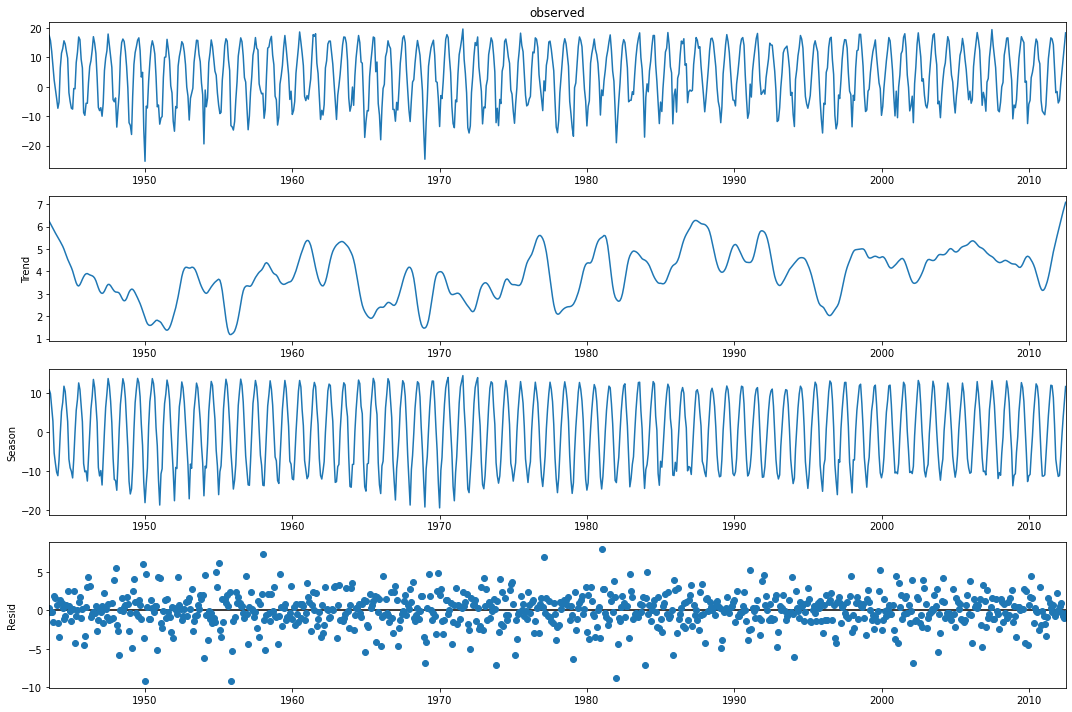

In [80]:
cgy_temp_decomp = get_STL_decomp(cgy_temp_df, 'observed')
print(cgy_temp_decomp.plot())

Figure(1080x720)
Figure(1080x720)


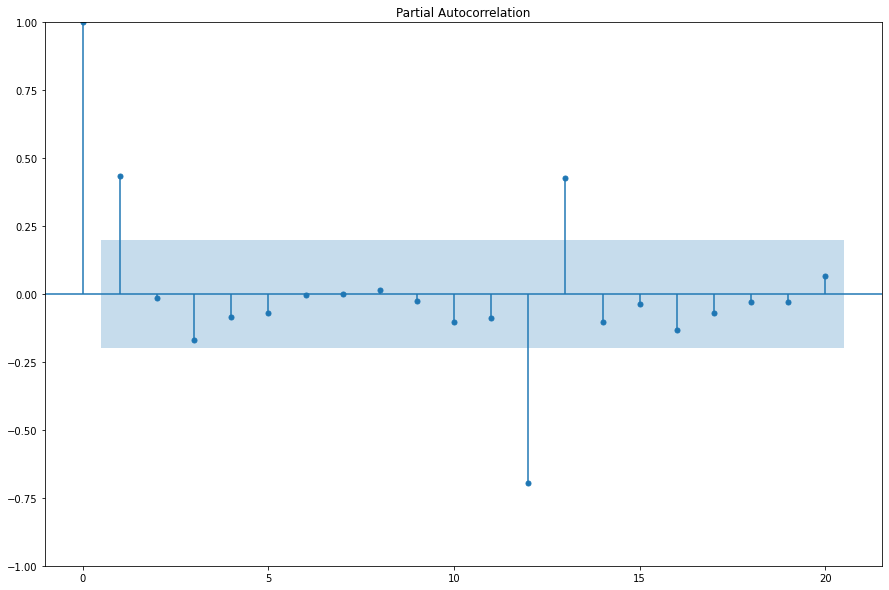

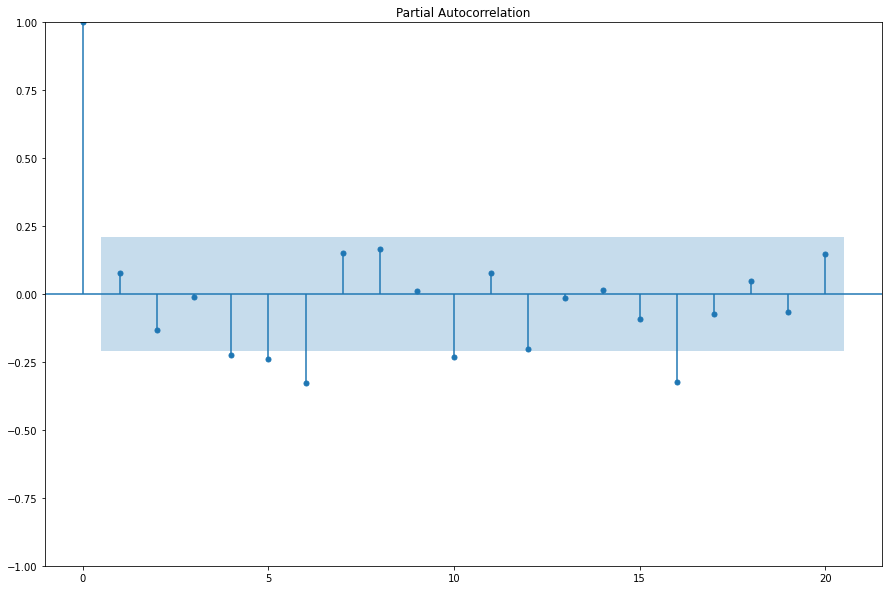

In [81]:
from statsmodels.graphics.tsaplots import plot_pacf
## Predictions from decomp
# Traffic Injuries & Eco station users

# Predict Trend using naive differences
traf_inj_pred_trend = 2 * traf_decomp.trend.shift(1) - traf_decomp.trend.shift(2)
eco_pred_trend = 2 * eco_decomp.trend.shift(1) - eco_decomp.trend.shift(2)

# Predict Seasonal using seasonal naive 

traf_inj_pred_ssnl = traf_decomp.seasonal.shift(12)
eco_pred_ssnl = eco_decomp.seasonal.shift(12)

# Predict residual using AR
print(plot_pacf(traf_decomp.resid, lags=20, method='ywm'))
print(plot_pacf(eco_decomp.resid, lags=20, method='ywm'))

Traffic = AR(12)   
Eco = AR(6)



1400.2687183501084

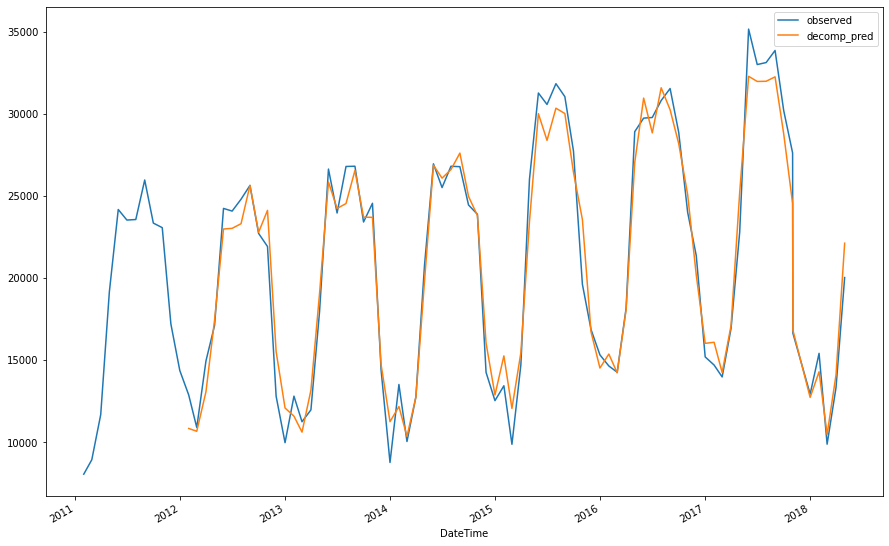

In [82]:
traf_coeffs = train_ar(traf_decomp.resid, 12)
traf_inj_pred_resid = predict(traf_coeffs, traf_decomp.resid)


eco_coeffs = train_ar(eco_decomp.resid, 6)
eco_pred_resid = predict(eco_coeffs, eco_decomp.resid)

eco_df['decomp_pred'] = eco_pred_trend + eco_pred_ssnl + eco_pred_resid
eco_df.plot(y=['observed', 'decomp_pred'])
rmse(eco_df['decomp_pred'], eco_df['observed'] )

0.12442746166408795

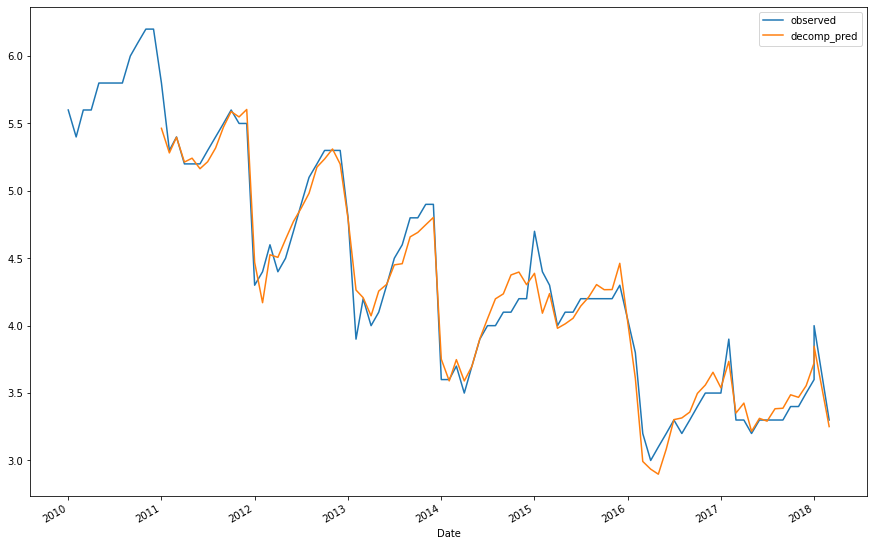

In [83]:
traf_inj_df['decomp_pred'] = traf_inj_pred_trend + traf_inj_pred_ssnl + traf_inj_pred_resid
traf_inj_df.plot(y=['observed', 'decomp_pred'])
rmse(traf_inj_df['decomp_pred'], traf_inj_df['observed'])

## ARIMA

Figure(1080x720)


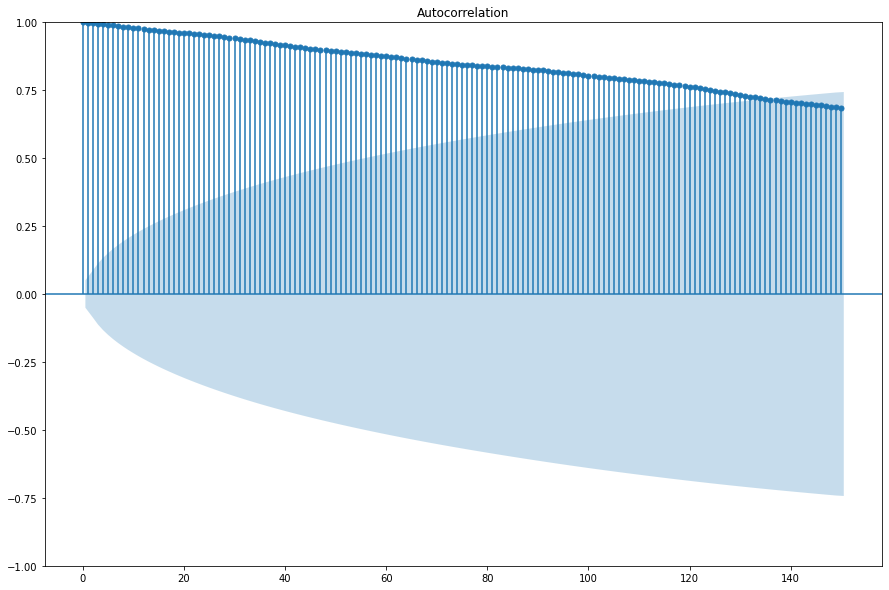

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
print(plot_acf(ethereum_df['Close'], lags=150))

None


c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


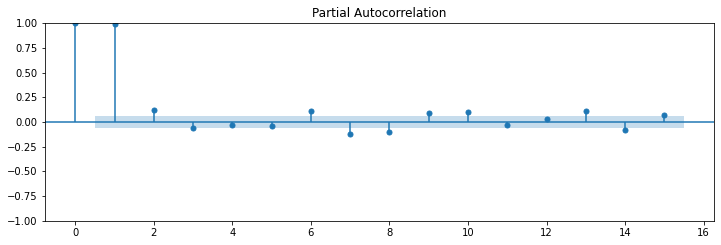

In [85]:
print(plot_pacf_df(ethereum_df,'Close'))
# try 6

In [86]:
def arima_rmse(df, col, order, log=False):
    if log == True:
        model = sm.tsa.arima.ARIMA(np.log(df[col]), order=order, trend='n')
    else:        
        model = sm.tsa.arima.ARIMA(df[col], order=order, trend='n')
    res = model.fit()
    if log == True:
        df['arima_pred'] = np.exp(res.predict())
    else:
        df['arima_pred'] = res.predict()
    print('RMSE FOR ARIMA: ', assess_predictions(df, col, 'arima_pred'))
    
    return df


ethereum_df = arima_rmse(ethereum_df, 'Close', (10,1,6))
#RMSE 6670
# ethereum_df_arima = arima_rmse(ethereum_df, 'Close', (10,1,6), True)
#lOG RMSE 7189


c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hugho

RMSE FOR ARIMA:  6670.82523681353


c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Date'>

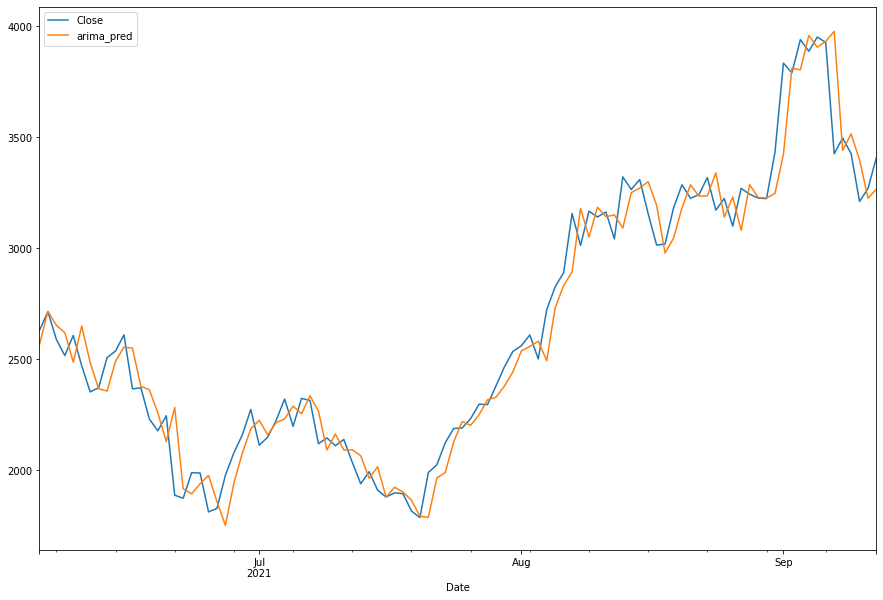

In [87]:
ethereum_df[1100:1200].plot(y=['Close','arima_pred'])

Figure(1080x720)
None


c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


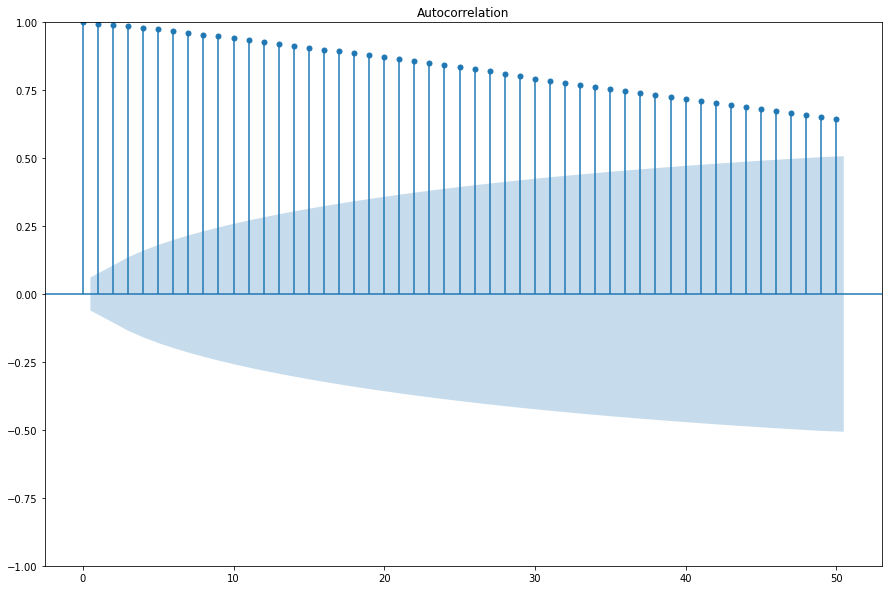

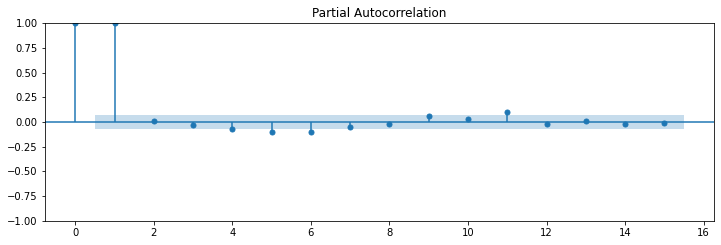

In [88]:
print(plot_acf(suncor_df['Close'], lags=50))
print(plot_pacf_df(suncor_df, 'Close'))

In [89]:
suncor_df = arima_rmse(suncor_df, 'Close', (25,1,6))

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimiza

RMSE FOR ARIMA:  0.3635608719548926


<AxesSubplot:xlabel='Date'>

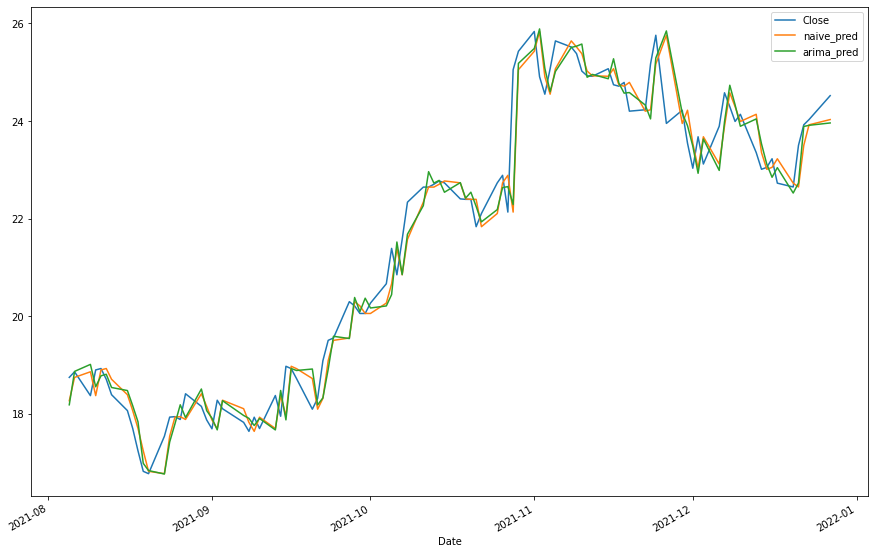

In [90]:
suncor_df[800:900].plot(y=['Close','naive_pred','arima_pred'])

# Seasonal ARIMA

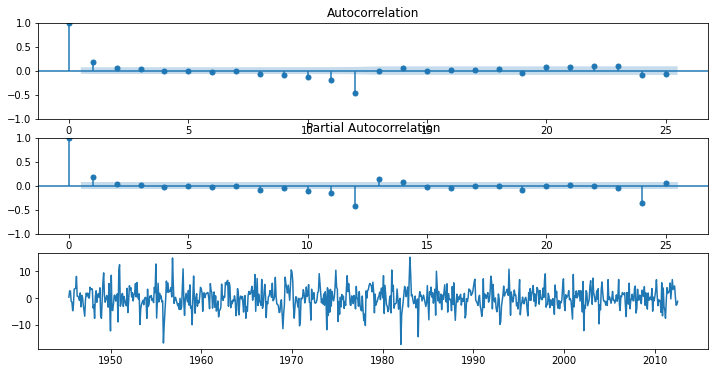

In [91]:
def plot_snl_acf_pacf(df, col, cycle_length):
   df['station'] = df[col] - df[col].rolling(cycle_length).mean()
   fig, ax = plt.subplots(3, figsize=(12,6))
   x = (df.station.dropna() - df.station.dropna().shift(cycle_length)).dropna()
   ax[0] = plot_acf(x, ax=ax[0], lags=25)
   ax[1] = plot_pacf(x, ax=ax[1], lags=25, method='ywm')
   ax[2].plot(x)

plot_snl_acf_pacf(cgy_temp_df, 'observed', 12)

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def run_sarimax(df, col, order, s_order, log=False):
    train_df, length = get_training_set(df, col, False)
    test_df = get_test_set(df, col, length)

    sarima_model = SARIMAX(train_df, order=order, seasonal_order=s_order, enforce_invertibility=False, enforce_stationarity=False)
    sarima_fit = sarima_model.fit()

    df['sarima_pred'] = sarima_fit.predict()
    print('MSE FOR Seasonal RIMA: ', assess_predictions(df, col, 'sarima_pred'))
    return df
    

In [93]:

cgy_temp_sarimax_df = run_sarimax(cgy_temp_df, 'observed', (1,1,2),(1,1,2,12), False)

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MSE FOR Seasonal RIMA:  4.491783696714726


<AxesSubplot:xlabel='Date'>

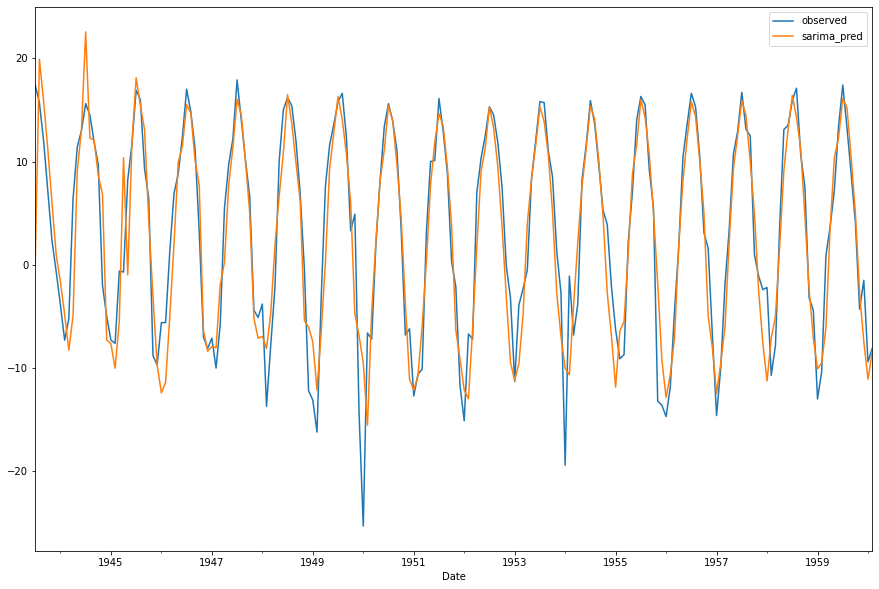

In [94]:
cgy_temp_sarimax_df[:200].plot(y=['observed','sarima_pred'])

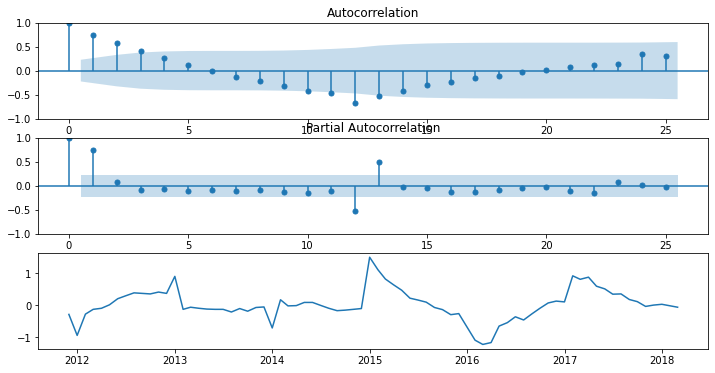

In [95]:
plot_snl_acf_pacf(traf_inj_df, 'observed', 12)

In [96]:
traf_inj_df_sarimax = run_sarimax(traf_inj_df, 'observed', (1,1,1), (1,1,1,12))

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE FOR Seasonal RIMA:  0.32751016335113065
